In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from src.datasets import daocensus_text
import src.utils.notebooks as nbutils

sns.set_theme()
plt.rcParams['figure.dpi'] = 600

In [2]:
# 'ORG_NAME', 'ORG_PLATFORM', 'SPLITS_FREQ', 'SPLITS_NORMALIZE', 'LAST_SPLITS', 'USE_ORG_NAMES'

ORG_NAME = 'gm DAO'
ORG_PLATFORM = 'snapshot'
USE_ORG_NAMES = True

# Not used
SPLITS_FREQ = ...
SPLITS_NORMALIZE = ...
LAST_SPLITS = ...
CUTOFF_DATE_STR = ...

In [3]:
# Parameters
ORG_NAME = "Aave - Aavegotchi"
ORG_PLATFORM = "snapshot"
SPLITS_FREQ = "5d"
SPLITS_NORMALIZE = True
LAST_SPLITS = 10
USE_ORG_NAMES = True
EXECUTION_ID = "2024-03-08 10:00"
CUTOFF_DATE_STR = "2023-07-29"


In [4]:
dfv, dfp = daocensus_text.get('./data/daos-census-text', ORG_NAME, ORG_PLATFORM, use_org_names=USE_ORG_NAMES)
dfp = dfp.set_index('id')
print(dfv.info())
print(dfp.info())

platform               name                                    id  \
0        snapshot  Aave - Aavegotchi  791776d0-e89d-5389-86da-d3dd456fe03b   
1        snapshot  Aave - Aavegotchi  83bb1a5a-4e99-5953-840f-f8ea929c0b8d   
2        snapshot  Aave - Aavegotchi  036778b6-4d1f-52f6-b111-47fe1f8527c4   
3        snapshot  Aave - Aavegotchi  e9ef7632-9cf8-5f1d-88fc-c3b27a25fd36   
4        snapshot  Aave - Aavegotchi  858dbf2e-6299-5e38-8a70-9433c67f4b57   
...           ...                ...                                   ...   
2326038  snapshot  Aave - Aavegotchi  081fa38c-a939-5d85-aa46-f78b6f68322e   
2326039  snapshot  Aave - Aavegotchi  add255e2-8688-5d56-aaef-3d917d8e33a9   
2326040  snapshot  Aave - Aavegotchi  bddc8137-4853-54b5-8000-5108b05a2b75   
2326041  snapshot  Aave - Aavegotchi  c96c7df1-9fdc-5cfa-8c68-40c4fbd589e7   
2326042  snapshot  Aave - Aavegotchi  7377ea75-00a1-5cee-b9b6-c1db0a313fb6   

                                     proposal  \
0        cf9a3163-c94e-54c2-a5e8-0c8181c0a05c   
1        cf9a3163-c94e-54c2-a5e8-0c8181c0a05c   
2        cf9a3163-c94e-54c2-a5e8-0c8181c0a05c   
3        cf9a3163-c94e-54c2-a5e8-0c8181c0a05c   
4        cf9a3163-c94e-54c2-a5e8-0c8181c0a05c   
...                                       ...   
2326038  d169ee83-c030-57a2-b6c5-5b5ea7efba03   
2326039  d169ee83-c030-57a2-b6c5-5b5ea7efba03   
2326040  d169ee83-c030-57a2-b6c5-5b5ea7efba03   
2326041  d169ee83-c030-57a2-b6c5-5b5ea7efba03   
2326042  d169ee83-c030-57a2-b6c5-5b5ea7efba03   

                                   deployment  \
0        377e7181-37e0-504d-b494-d26df613abdc   
1        377e7181-37e0-504d-b494-d26df613abdc   
2        377e7181-37e0-504d-b494-d26df613abdc   
3        377e7181-37e0-504d-b494-d26df613abdc   
4        377e7181-37e0-504d-b494-d26df613abdc   
...                                       ...   
2326038  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
2326039  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
2326040  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
2326041  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
2326042  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   

                                             platform_vote  \
0           QmPuaRP2wcpXHdWm8Afscn9KCzj1ziG21cZKPe4fTLr5xK   
1           QmNpcso4H4cmL9zD141XBegQiWjPxv12gbRSDkw1n3CjhL   
2           QmPpoXfKEEXWoTPDSH4WABvZCNse5QCWDjh1W3ic7Ysn4F   
3           Qmd8oVTHcNiTAwLRHuXU39spMMemtgxo3Cqh9YZMhUaBk5   
4           QmaZYJ8rUD2DuW9rTXxasXAZTkK3s54NmyWDTd21PamJ43   
...                                                    ...   
2326038  0xafd37532ce36c443a6b5cacd62d46201658c34bdd87d...   
2326039  0x161ce1b82c139fd4eed73a434f66acfff33b81d2997a...   
2326040  0xb73f076835d02a8ba28f83a30c04413494a9f7676211...   
2326041  0x0bc477483f1be15146d3e344c7bacf788bf60623e2a5...   
2326042  0x0815382db0fd546b143ee3fb9487bf01d4966dd780ee...   

                                              voter                date  \
0        0x9080196182f77b89bb5b0eee3ddb48cfa716c4c3 2021-08-20 04:58:39   
1        0x4cd3210ce0e7aef75ecff5475b75034dc328b1d4 2021-08-20 02:26:10   
2        0x9b93b3de14160d9ca56512e49f6d94cc761c1612 2021-08-19 23:42:35   
3        0x303f68639795a93778a205b8c050bd1d1136cb95 2021-08-19 22:39:01   
4        0x6519e6117480d140cd7d33163ac30fd01812f34a 2021-08-19 19:04:03   
...                                             ...                 ...   
2326038  0x7e88cfcdf8dd21649f09ec8da9d7d6496d989574 2023-02-19 14:17:38   
2326039  0x44a8a15e977e10ef9af74a16a7f30b9af7f237ee 2023-02-19 14:17:41   
2326040  0x21b1e90f22a002c82d1f4d391c97f34287618477 2023-02-19 14:17:41   
2326041  0x0d06be74b7fff065c6c47f93872eda643f1d0a34 2023-02-19 14:17:42   
2326042  0x23ac076752012c43f9e8277932d13ea8d9cd64f7 2023-02-19 14:17:44   

                                                  choice   weight  
0                           [5073.832030849184, 7937, 0]  13010.0  
1                           [801.7266581485371, 1024, 0]   1825.0  
2                           [74.863366873174

Warning, removing 2326043 votes without proposal


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326043 entries, 0 to 2326042
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   platform       object        
 1   name           object        
 2   id             object        
 3   proposal       category      
 4   deployment     object        
 5   platform_vote  object        
 6   voter          category      
 7   date           datetime64[ns]
 8   choice         object        
 9   weight         float64       
dtypes: category(2), datetime64[ns](1), float64(1), object(6)
memory usage: 173.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 719 entries, 895484e8-e4b3-59ff-841a-1a2700af3497 to 25efc708-125c-50dd-afaa-25400a8ec266
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   platform             719 non-null    object        
 1   name                 

# Exploración de datos de Decentraland

In [5]:
print(f"{ORG_NAME} tiene {len(dfv)} votos de {dfv['voter'].nunique()} voters en {dfv['proposal'].nunique()} propuestas")

Aave - Aavegotchi tiene 2326043 votos de 73446 voters en 719 propuestas


In [6]:
dfd = dfp[['platform', 'name', 'platform_deployment']].drop_duplicates()
dfd

platform               name  \
id                                                                  
895484e8-e4b3-59ff-841a-1a2700af3497  snapshot  Aave - Aavegotchi   
43c21551-66a1-524c-8029-b15fe809bd64  snapshot  Aave - Aavegotchi   

                                     platform_deployment  
id                                                        
895484e8-e4b3-59ff-841a-1a2700af3497      aavegotchi.eth  
43c21551-66a1-524c-8029-b15fe809bd64            aave.eth

## Histograma de votos por usuario

73446
4204
count    73446.000000
mean        31.670111
std         38.817286
min          1.000000
50%         13.000000
90%         85.000000
95%        108.000000
99%        166.000000
max        408.000000
dtype: float64


Cannot show ipywidgets in text

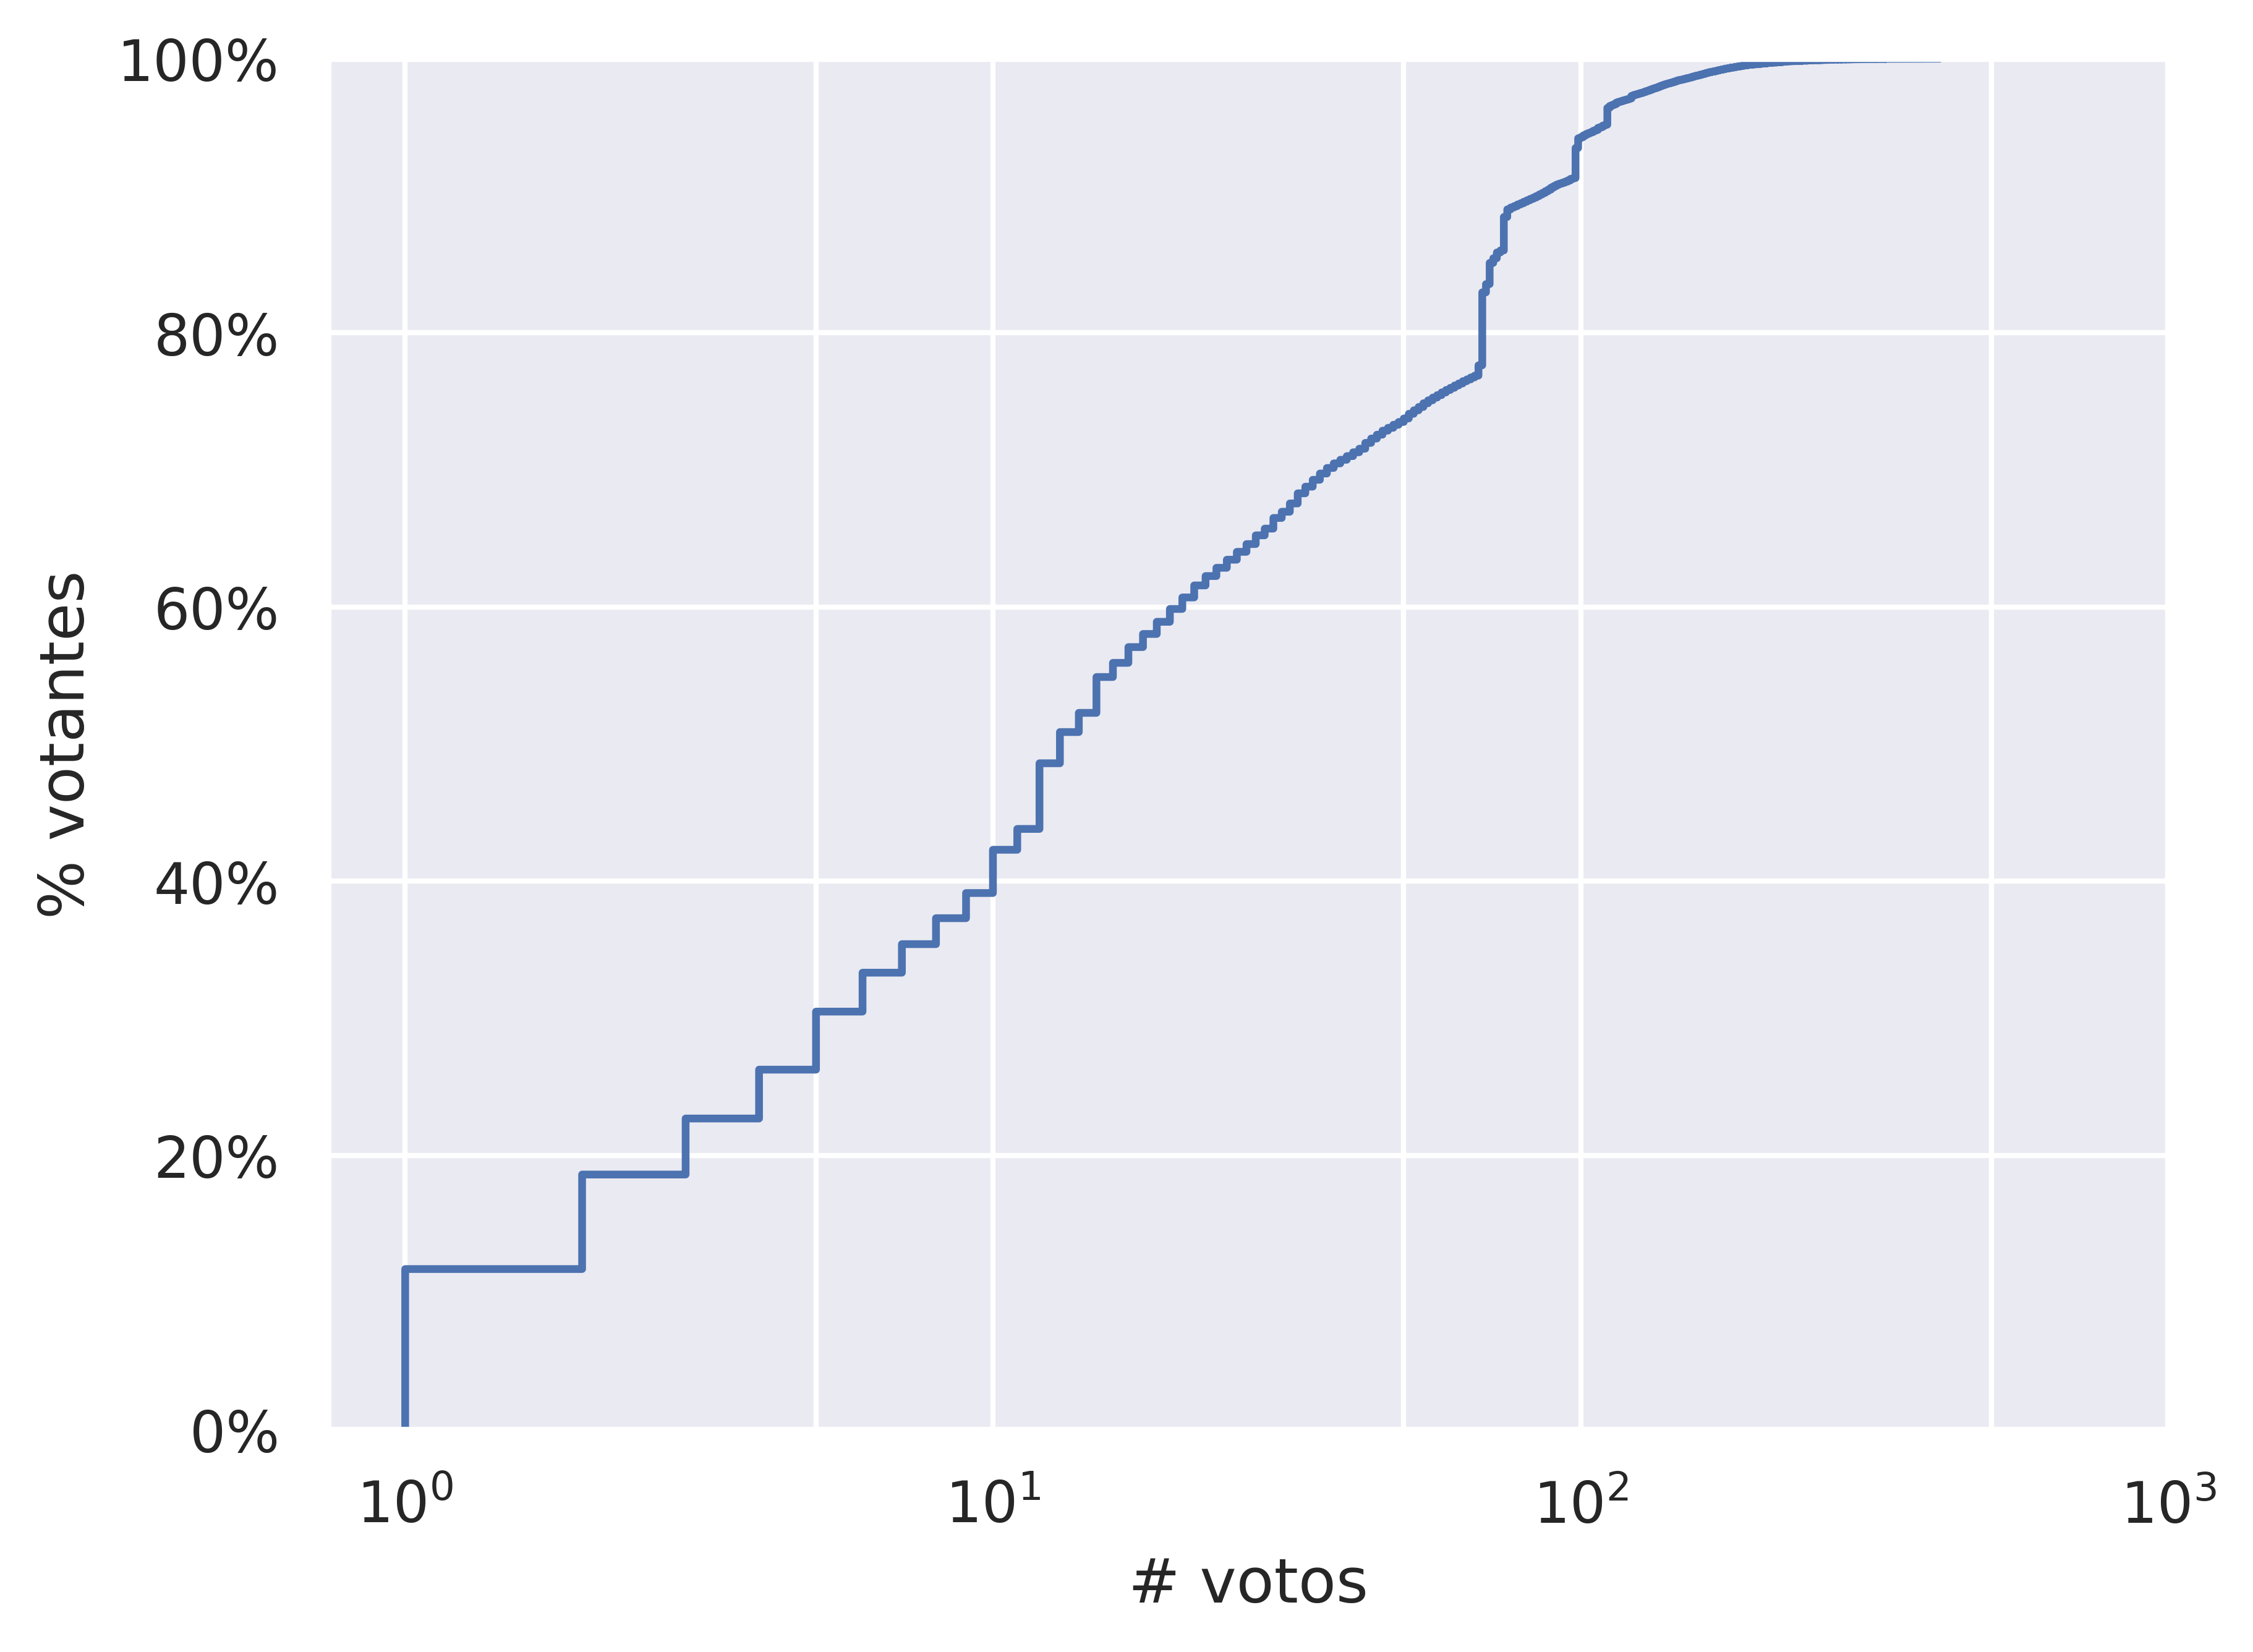

In [7]:
_toplot = dfv.groupby('voter').size()
# _toplot = _toplot[_toplot < 40]
print( len(_toplot) )
print( (_toplot > 100).sum() )
print(_toplot.describe(percentiles=[.5, .9, .95, .99]))
# _toplot.plot.hist(log=True)
ax = sns.ecdfplot(_toplot, log_scale=True)
plt.xlabel('# votos')
plt.ylabel('% votantes')

ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
# ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_voters_{ORG_NAME}.pdf')

## Histograma de votos por propuesta

count      719.000000
mean      3235.108484
std       4729.067982
min          1.000000
50%       1292.000000
75%       2565.000000
90%      11060.400000
95%      16064.300000
99%      17265.100000
max      21321.000000
Name: votes_count, dtype: float64
590


Cannot show ipywidgets in text

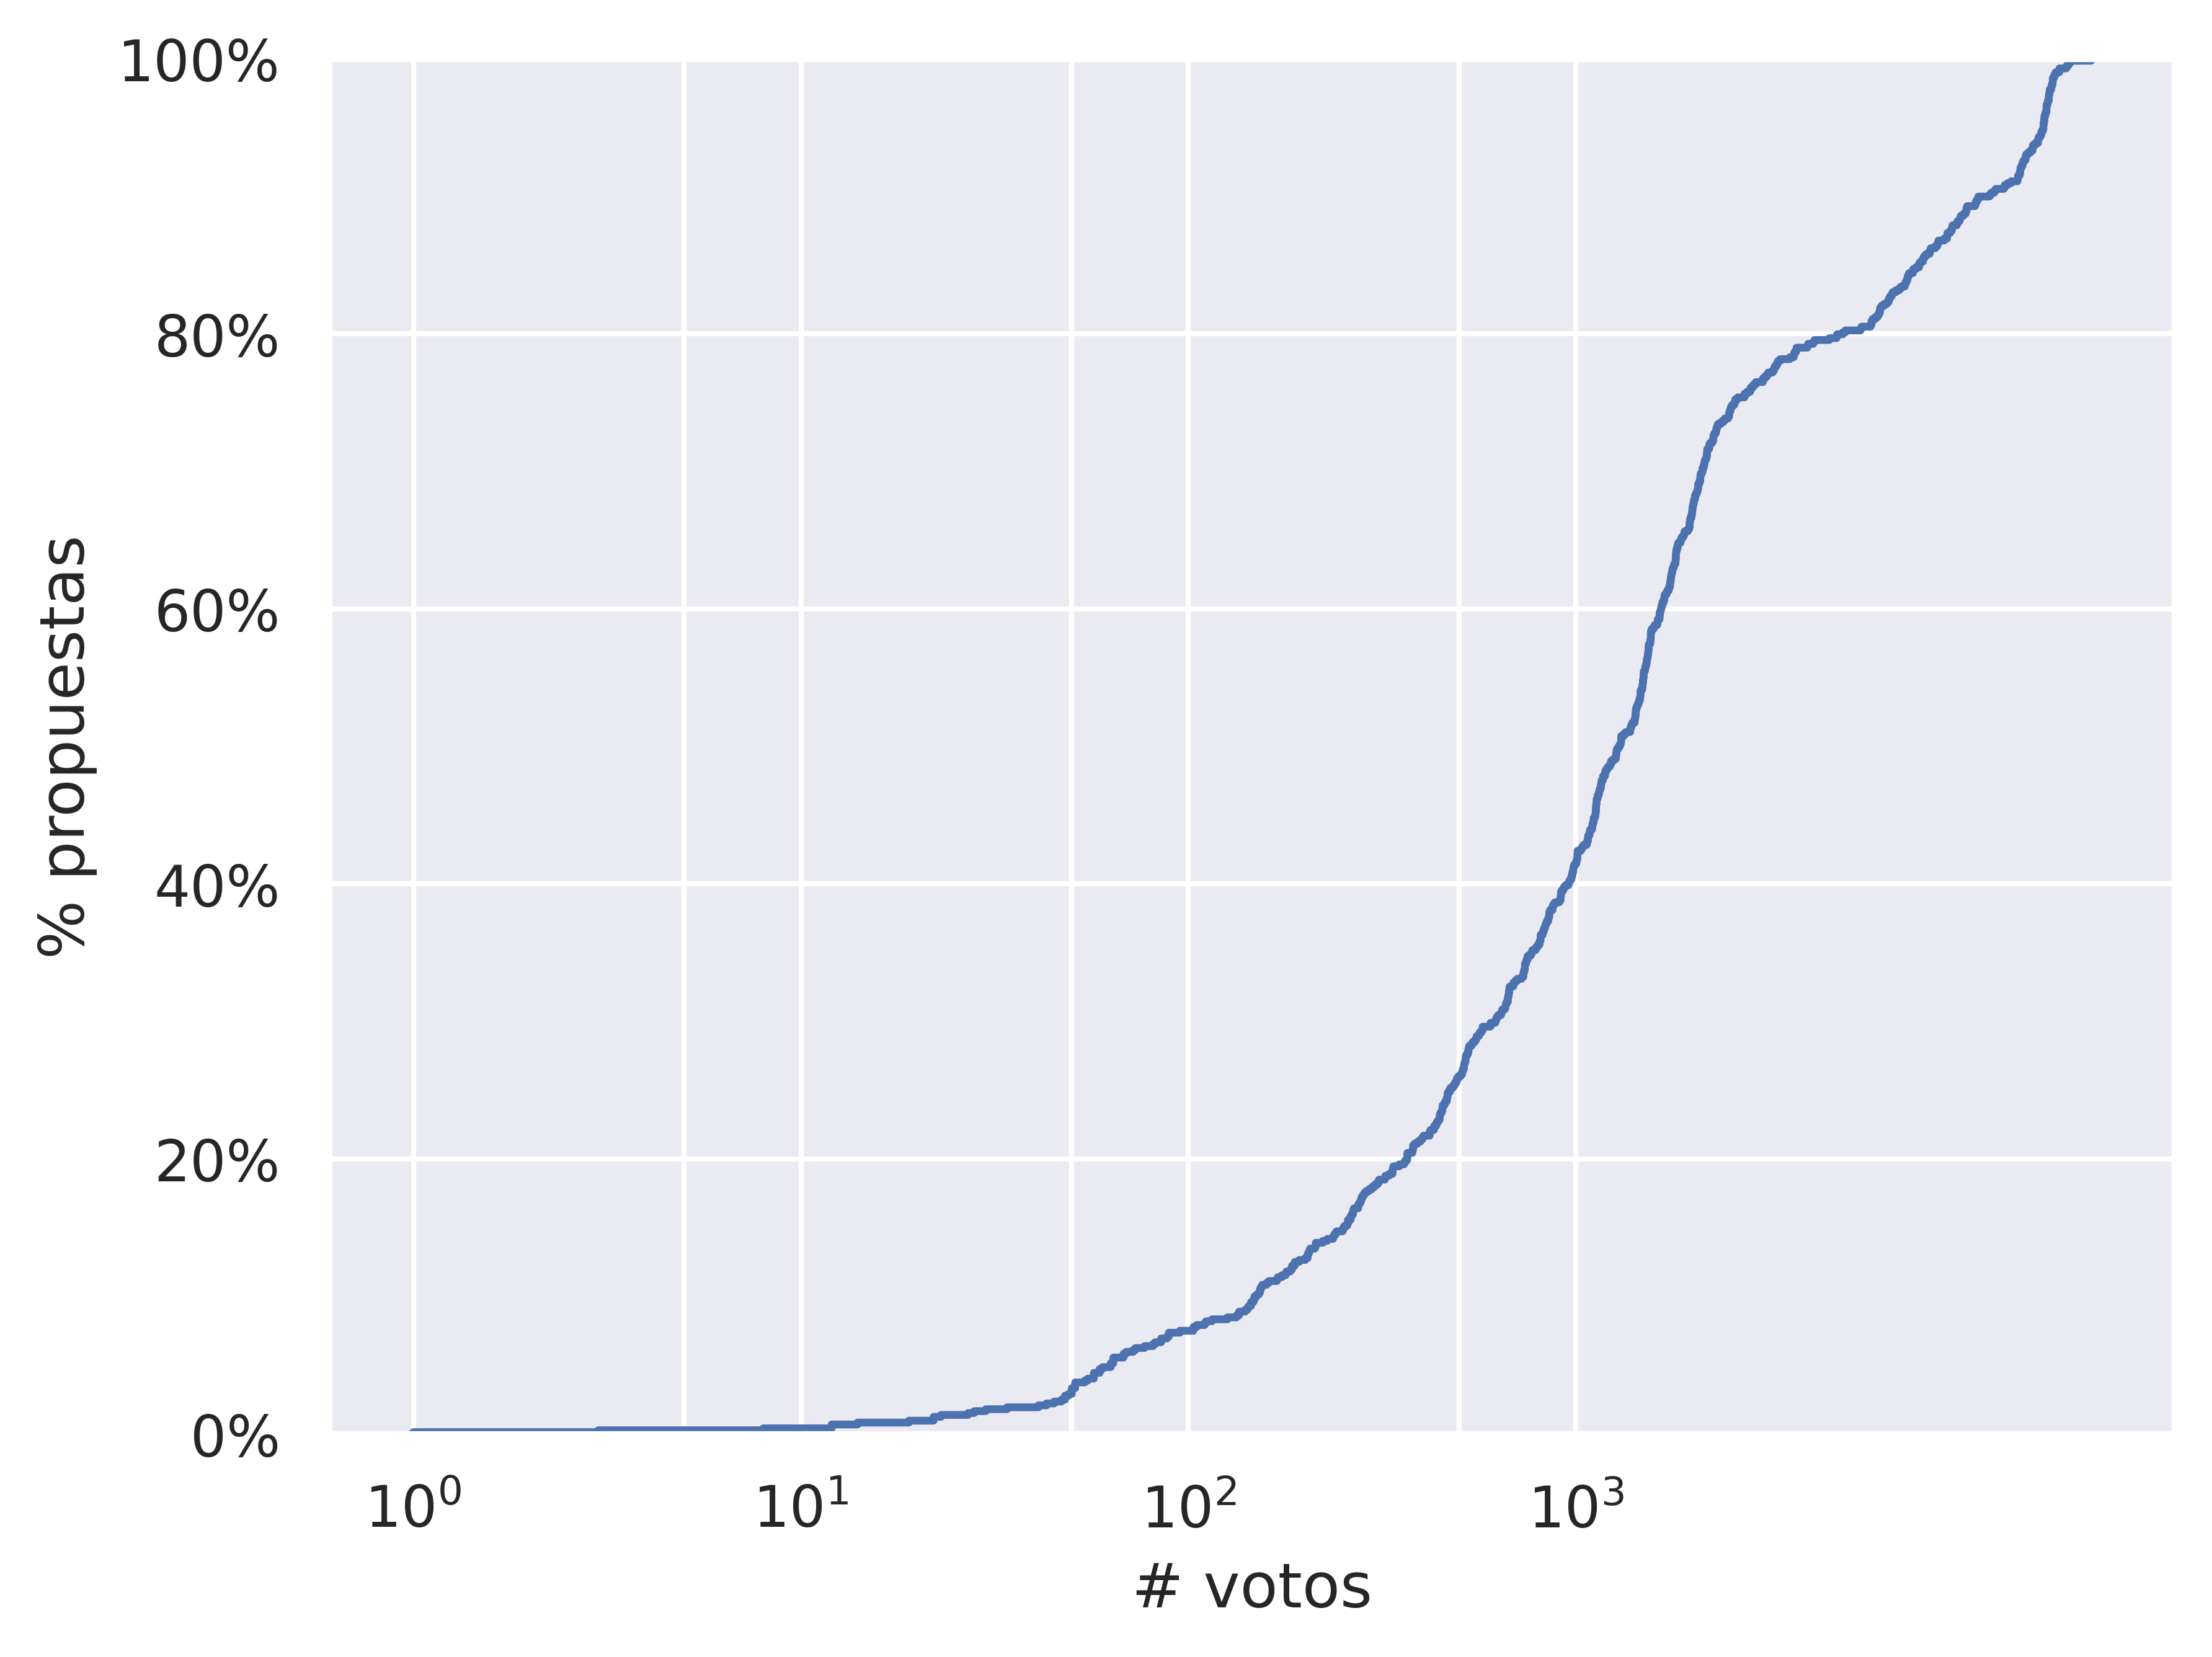

In [8]:
_toplot = dfp['votes_count']
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )

ax = sns.ecdfplot(_toplot, log_scale=True)
ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xlabel('# votos')
plt.ylabel('% propuestas')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_proposals_{ORG_NAME}.pdf')

count      719.000000
mean      3235.108484
std       4729.067982
min          1.000000
50%       1292.000000
75%       2565.000000
90%      11060.400000
95%      16064.300000
99%      17265.100000
max      21321.000000
dtype: float64
590


<Axes: ylabel='Proportion'>

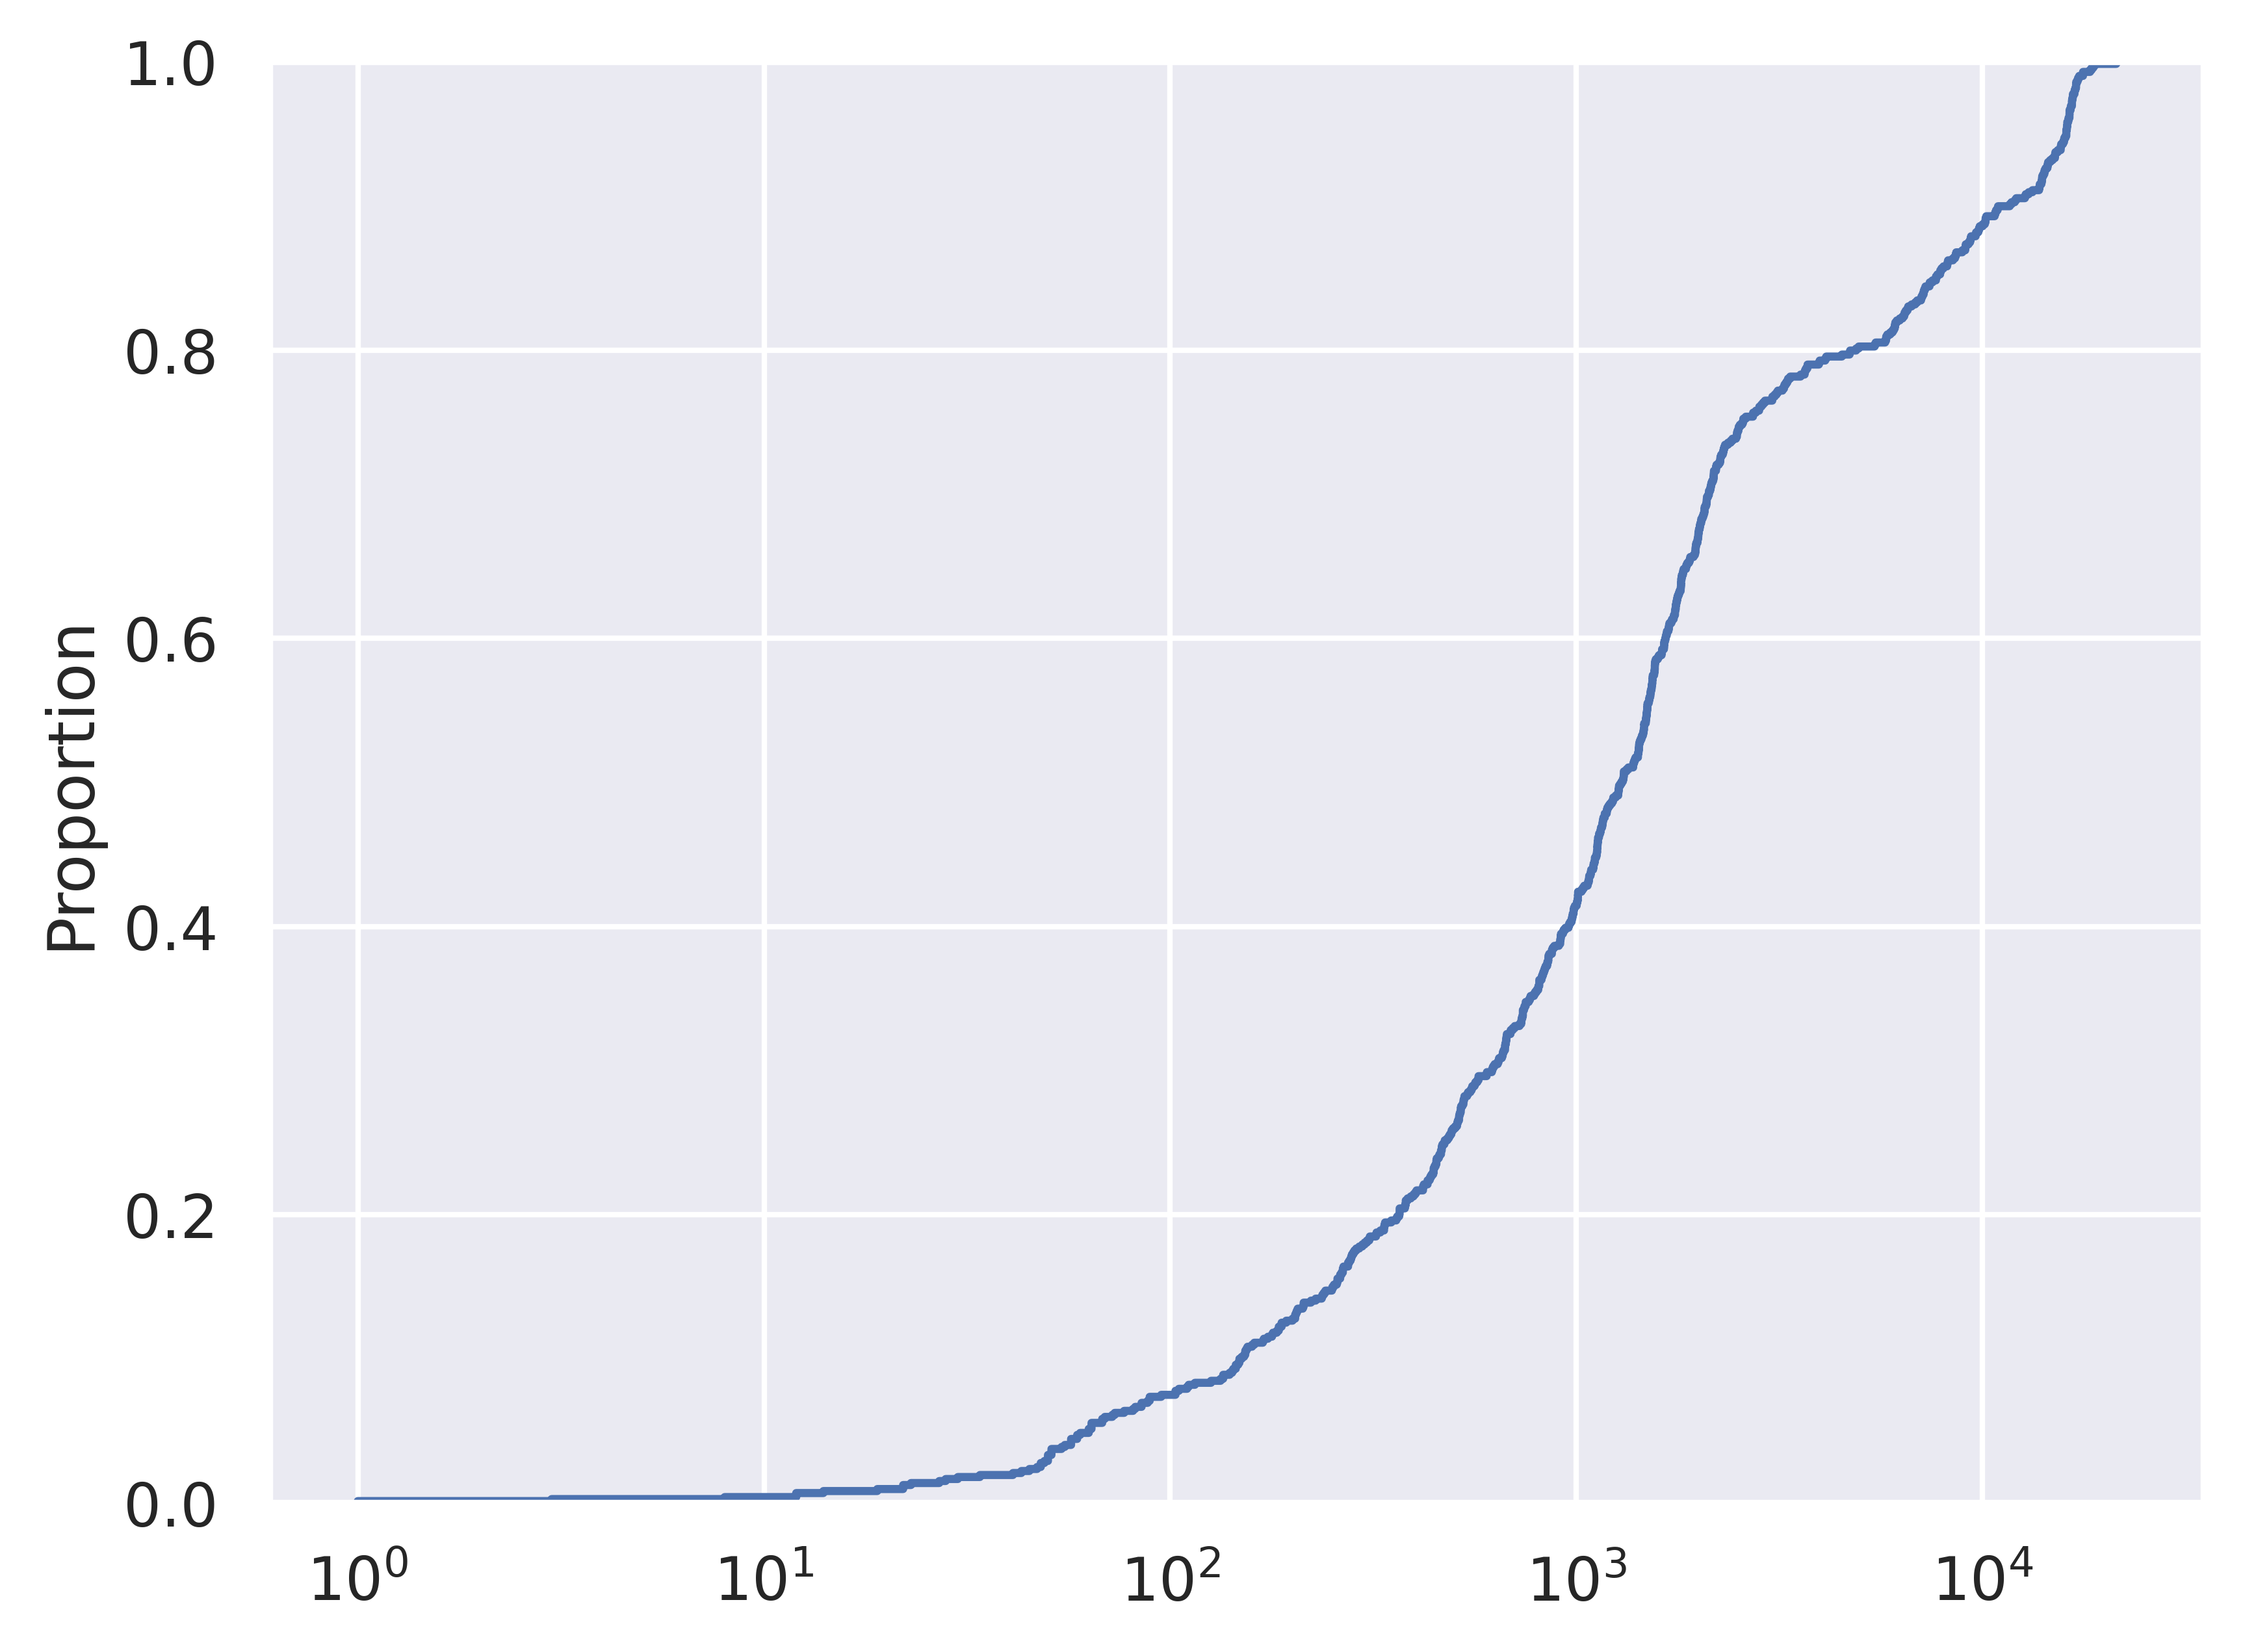

In [9]:
_toplot = dfv.groupby('proposal').size()
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )
sns.ecdfplot(_toplot, log_scale=True)

### Usuarios activos

In [10]:
# dfv.set_index('date').sort_index()['voter'].tolist()
# for x in dfv.set_index('date').sort_index()['voter'].items():
#     print(x)

/tmp/ipykernel_345141/3928196604.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/2326043 [00:00<?, ?it/s]

2020-09-17 18:50:14 2023-07-20 16:39:36


Cannot show ipywidgets in text

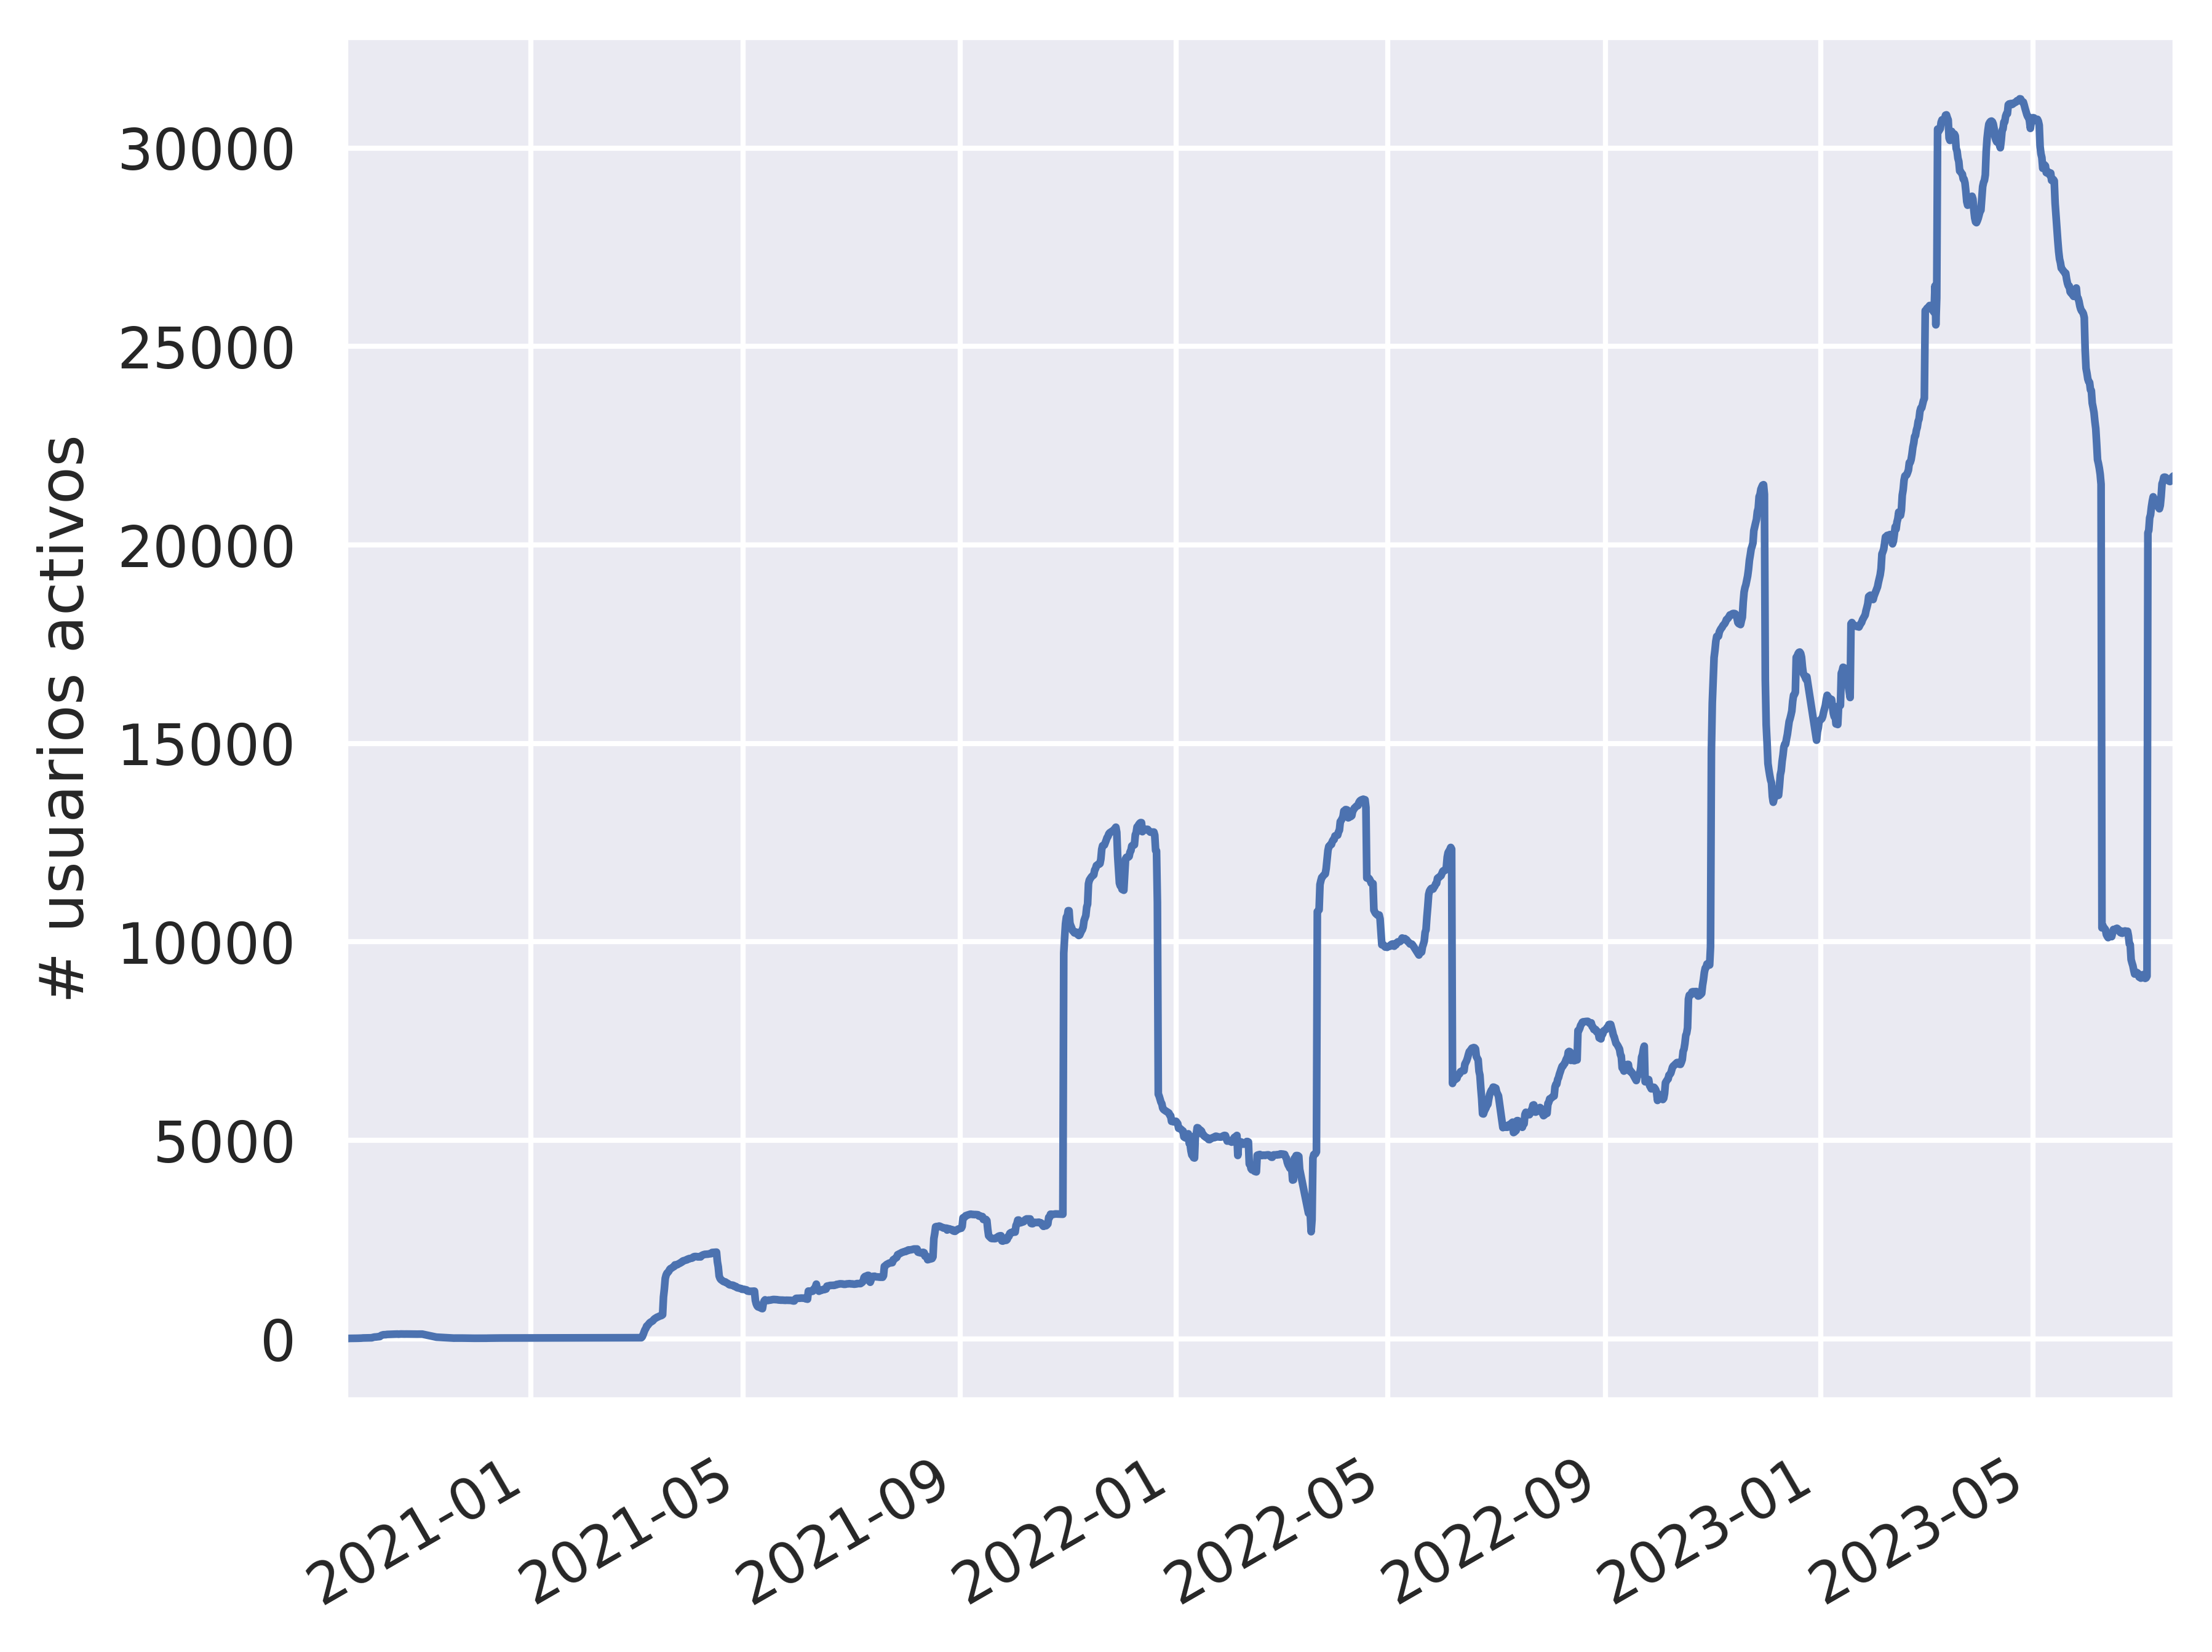

In [11]:
# import numba
from tqdm.autonotebook import tqdm
import rolling
import datetime as dt

tqdm.pandas(total=len(dfv))

# WINDOW_SIZE = '30D'
WINDOW_SIZE = dt.timedelta(days=30)

RESAMPLE_FREQ = '12h'

# @numba.jit(nopython=True)
# def nunique(arr):
#     return len(set(arr))

# Rolling no acepta tipos no númericos en la agregación, por lo que es necesario convertir la categoría a entero
# Por ejemplo, usando el código que le asigna Pandas
# dfv['ucode'] = dfv['voter'].cat.codes
#_cnt = dfv.set_index('date').sort_index().rolling(WINDOW_SIZE)['ucode'].progress_apply(nunique, raw=True).rename('cnt')

# Al final resulta que lo mejor era ir a por la solución O(1)
_voters = dfv.set_index('date').sort_index()['voter'] # .cat.codes
r = tqdm(
    rolling.arithmetic.Nunique(_voters.items(), WINDOW_SIZE, window_type='indexed'),
    total=len(dfv),
)
_cnt = pd.Series(r, index=_voters.index)
# Need to resample or there would be too many points
_cnt = _cnt.resample(RESAMPLE_FREQ).max()

print(dfv['date'].min(), dfv['date'].max())
ax = sns.lineplot(_cnt)
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# usuarios activos')
plt.xlim(dfv['date'].min(), dfv['date'].max())
nbutils.download_matplotlib(ax.figure, f'04c_rolling_voters_{WINDOW_SIZE}_{ORG_NAME}.png')

## Cuando se unen los usuarios

Es decir, cuando votan por primera vez

Cannot show ipywidgets in text

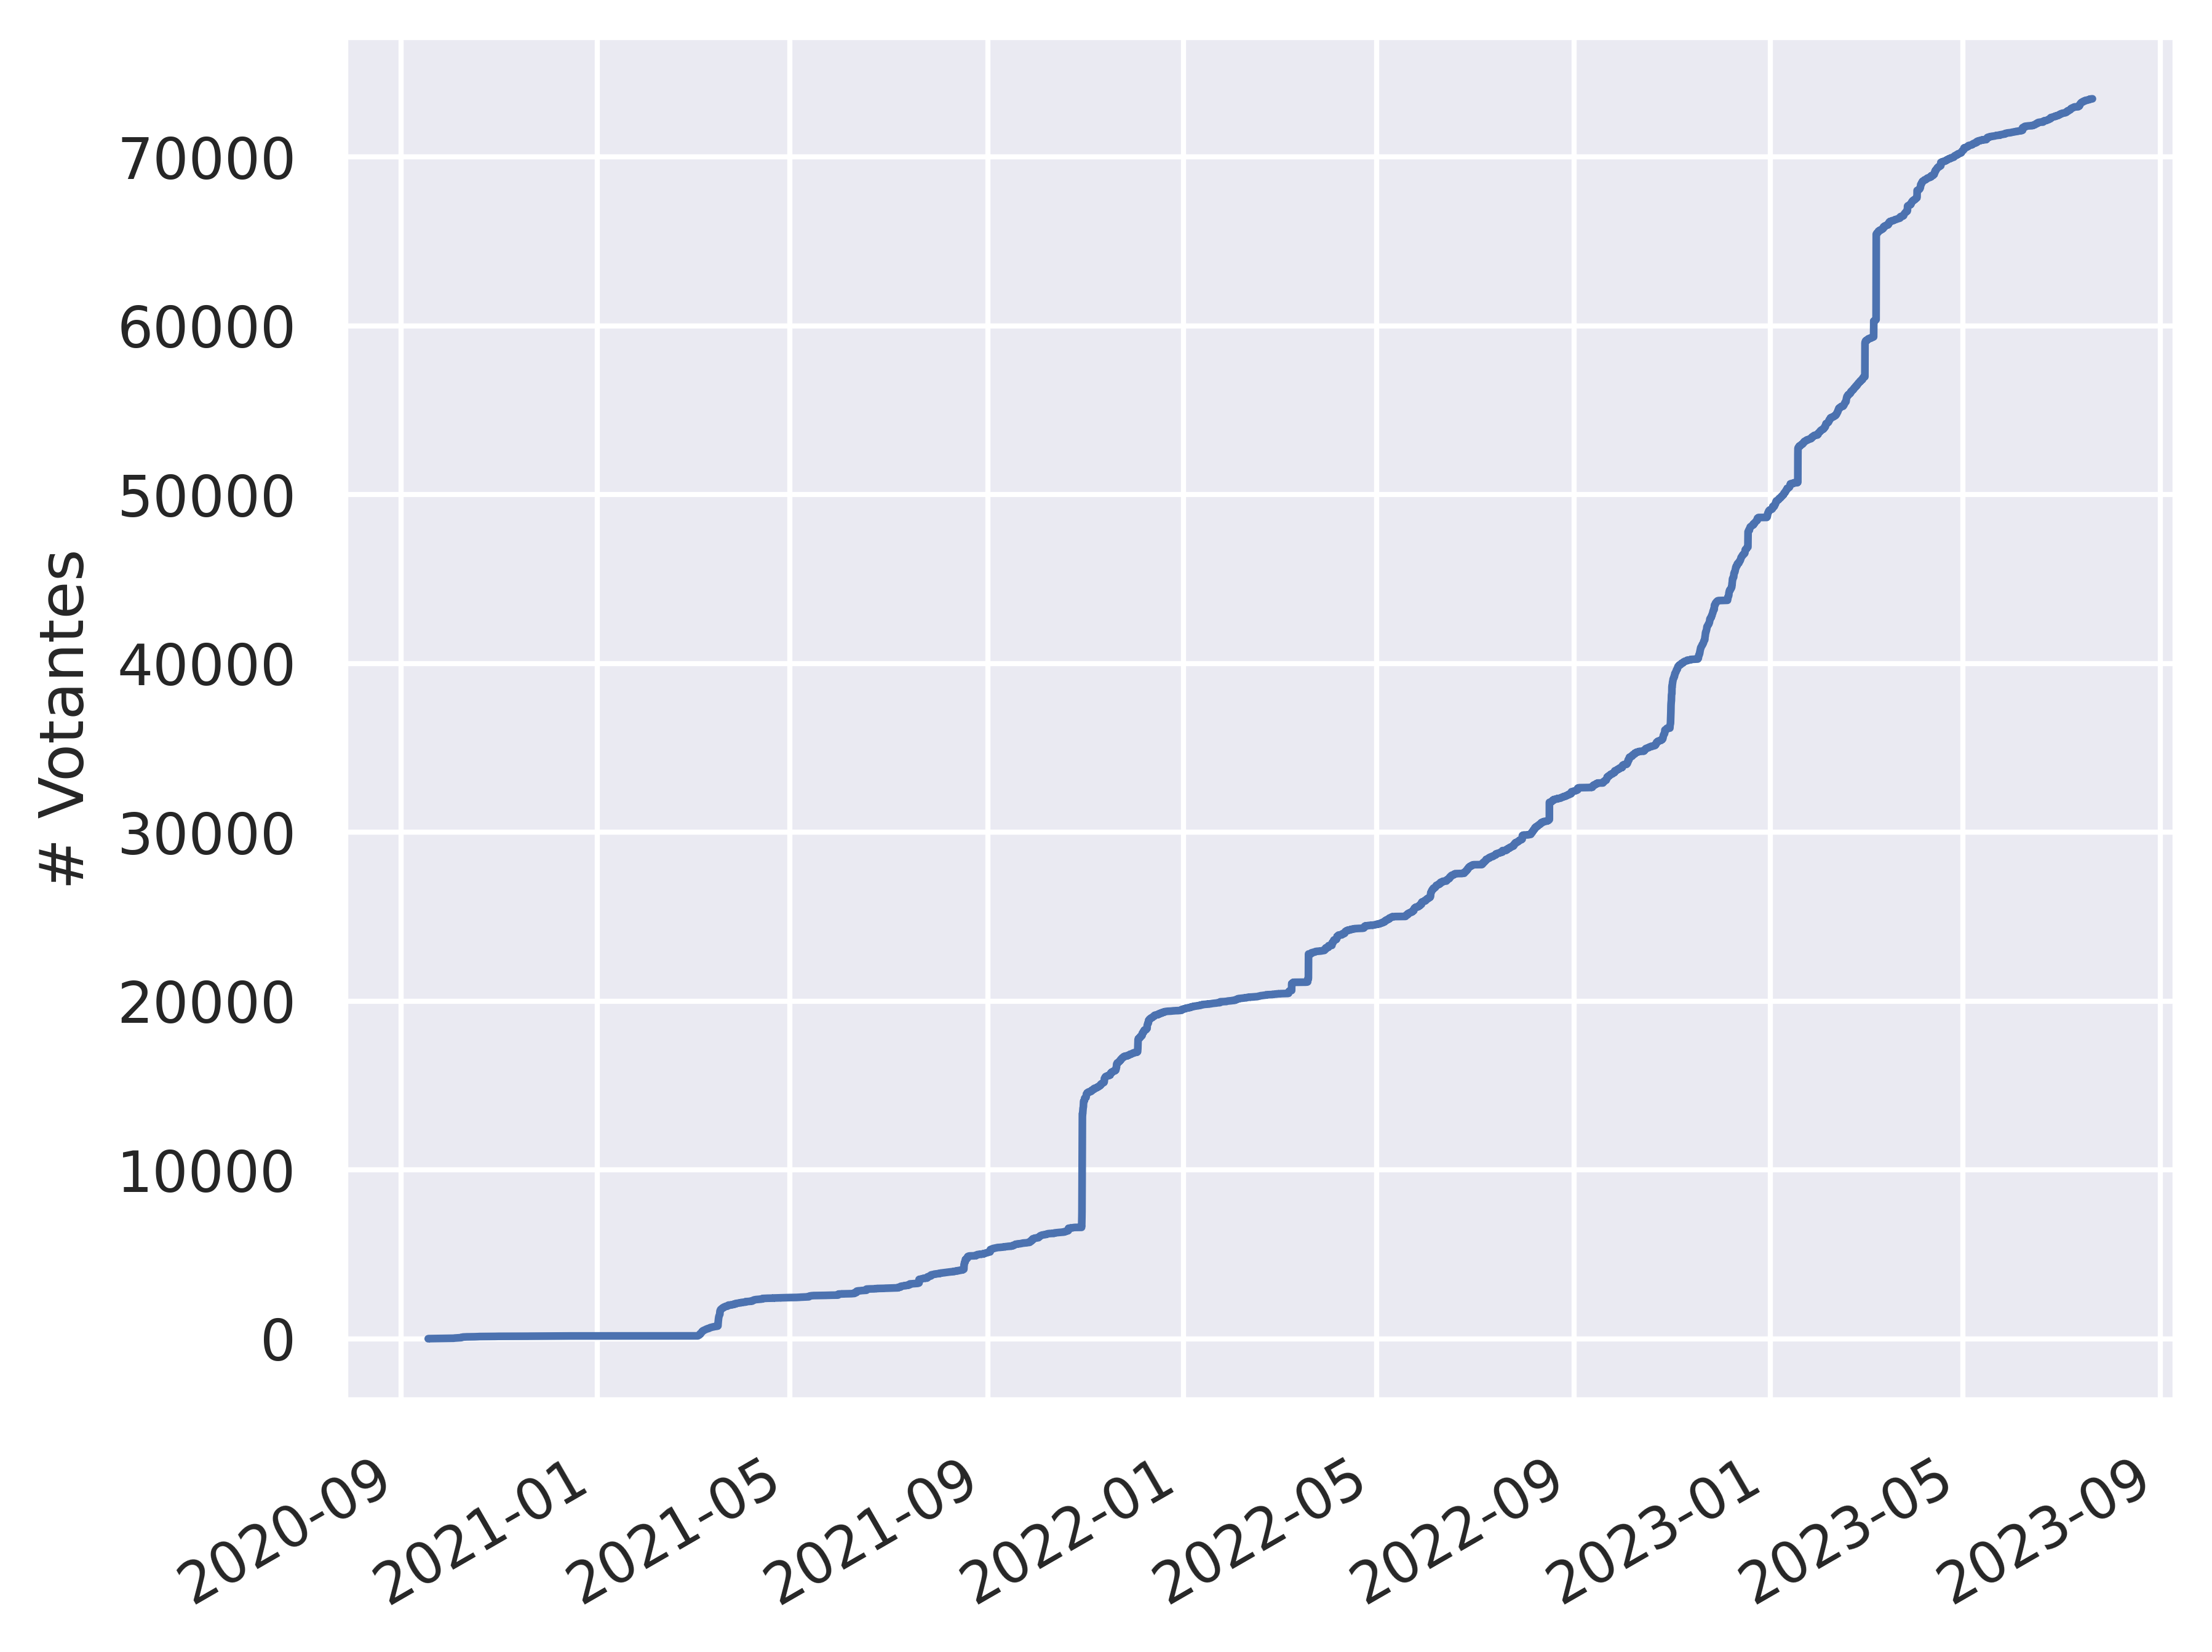

In [12]:
_toplot = dfv.groupby('voter')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Votantes')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_cumcnt_users_{ORG_NAME}.pdf')

## Cuando se crean las propuestas

Cannot show ipywidgets in text

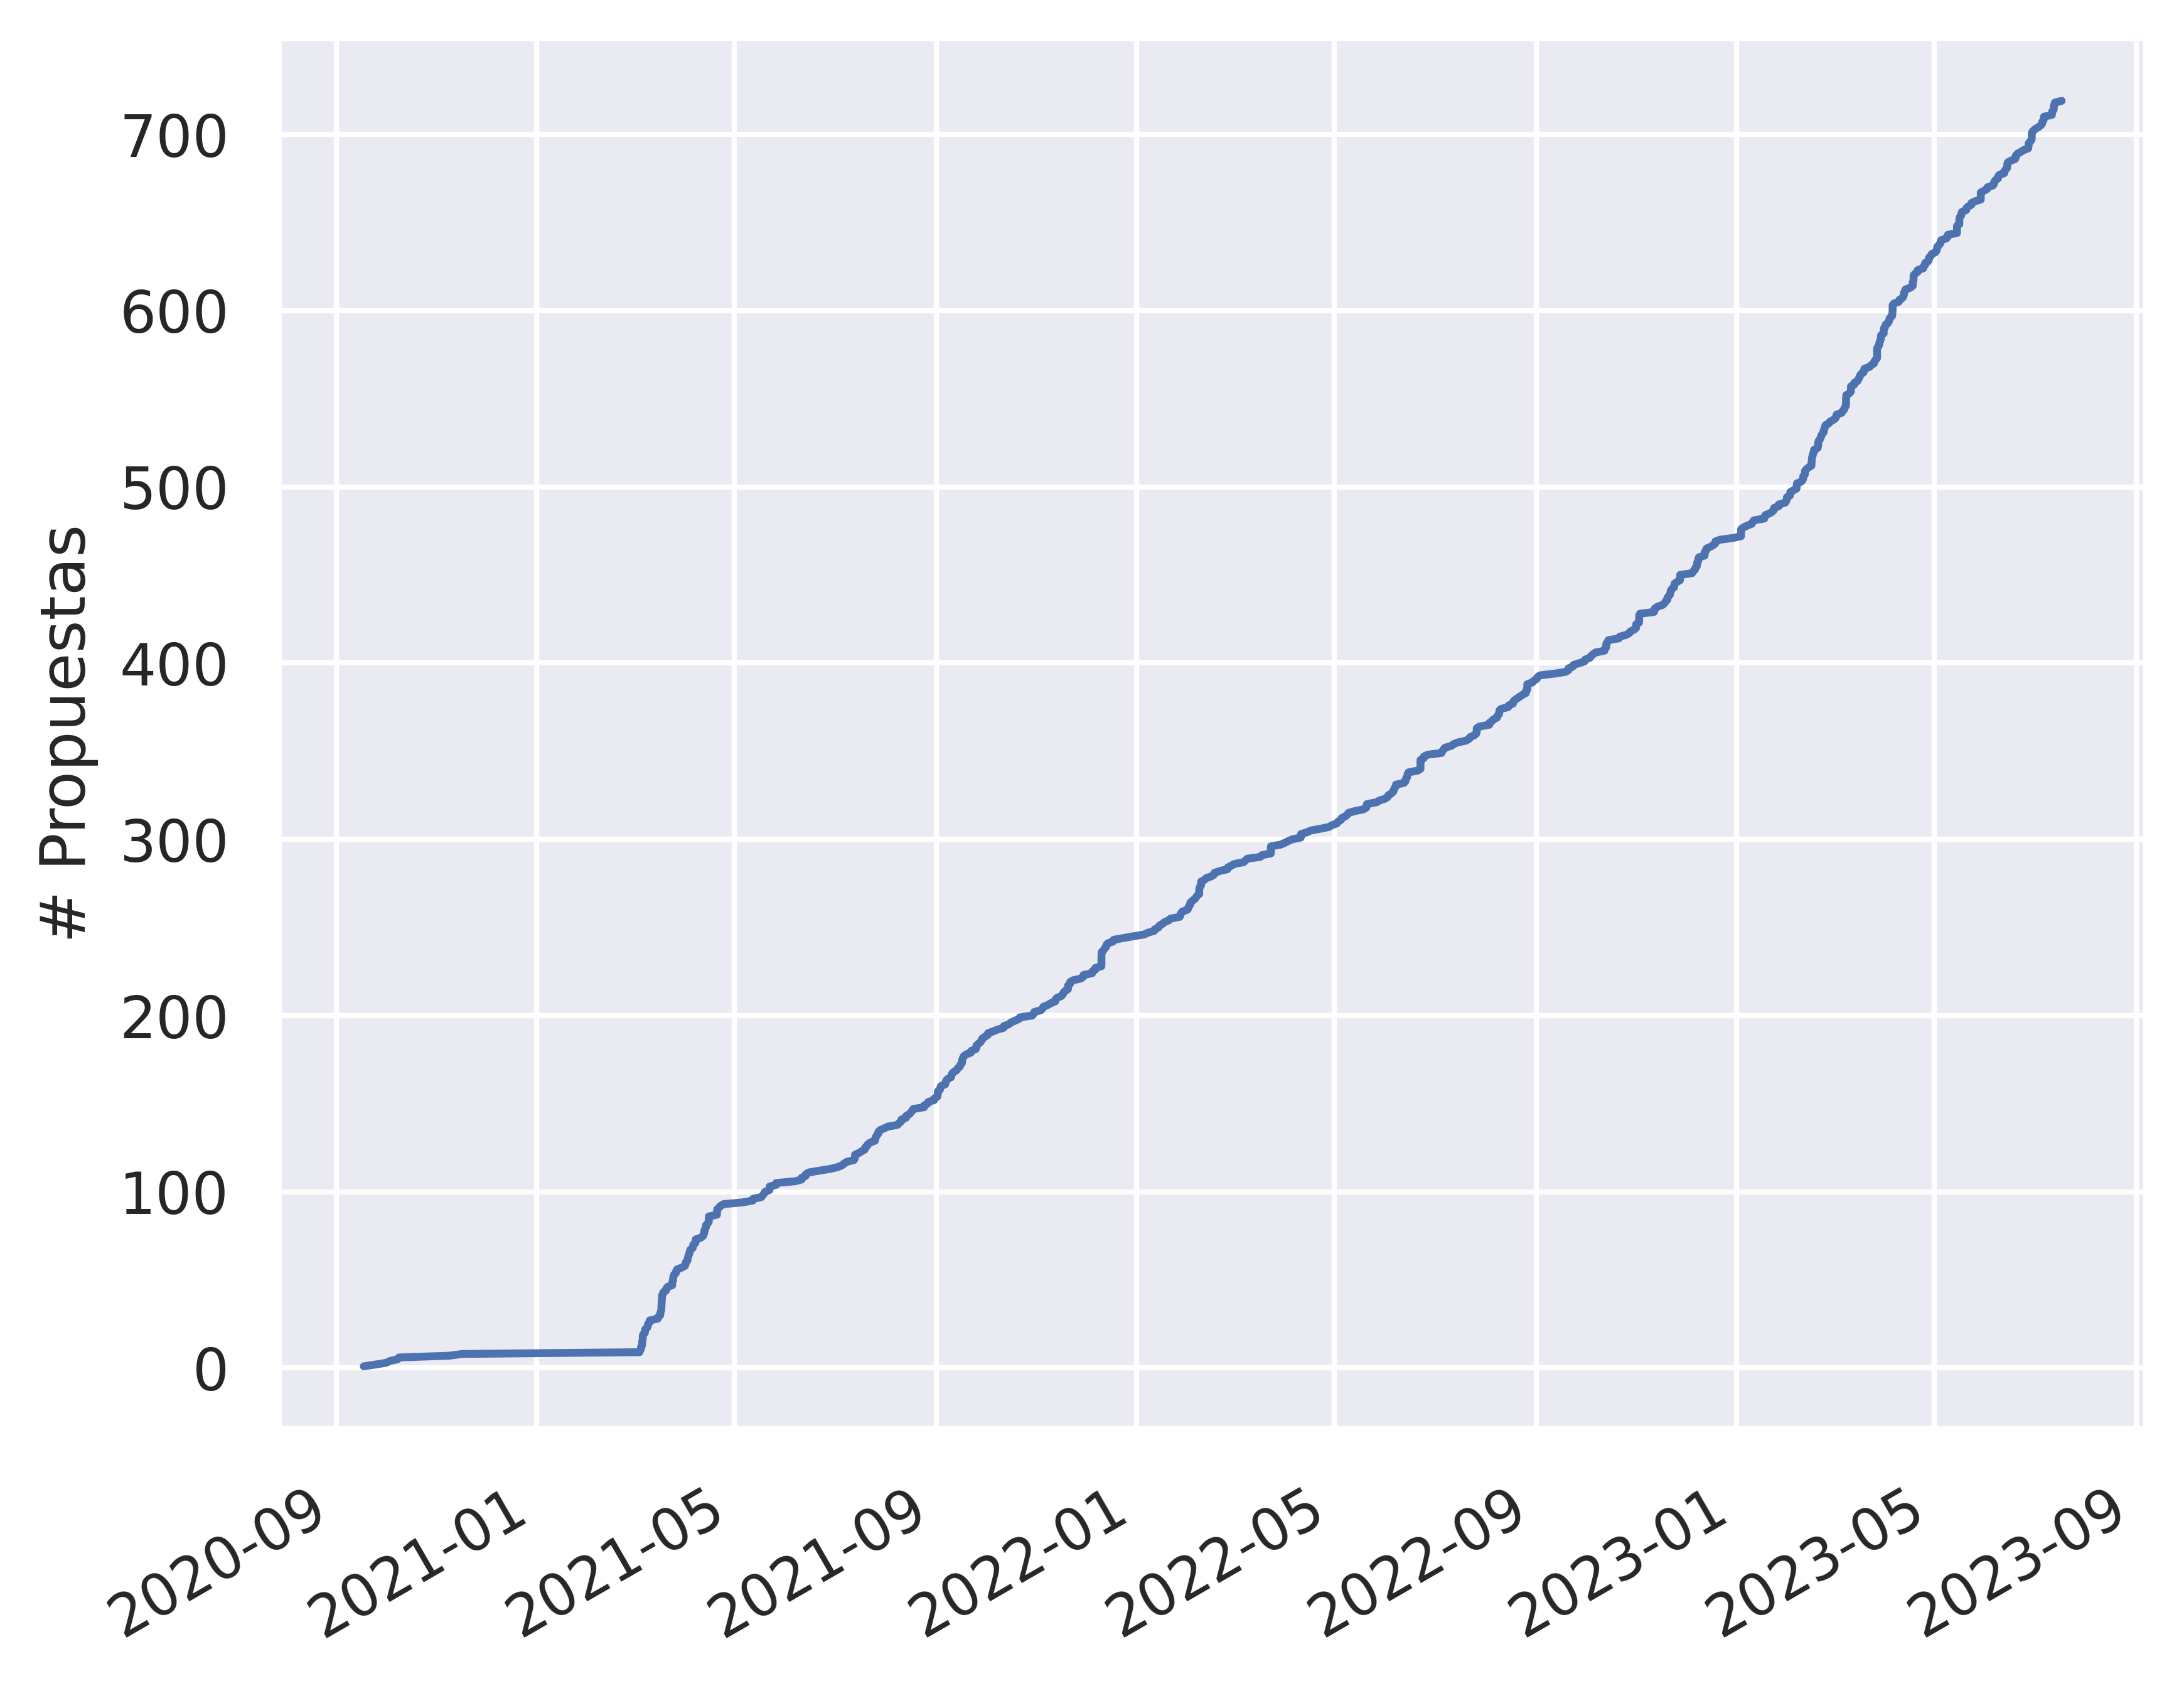

In [13]:
_toplot = dfv.groupby('proposal')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Propuestas')

nbutils.download_matplotlib(ax.figure, f'04c_cumcnt_users_{ORG_NAME}.pdf')

Cannot show ipywidgets in text

<Figure size 3840x2880 with 0 Axes>

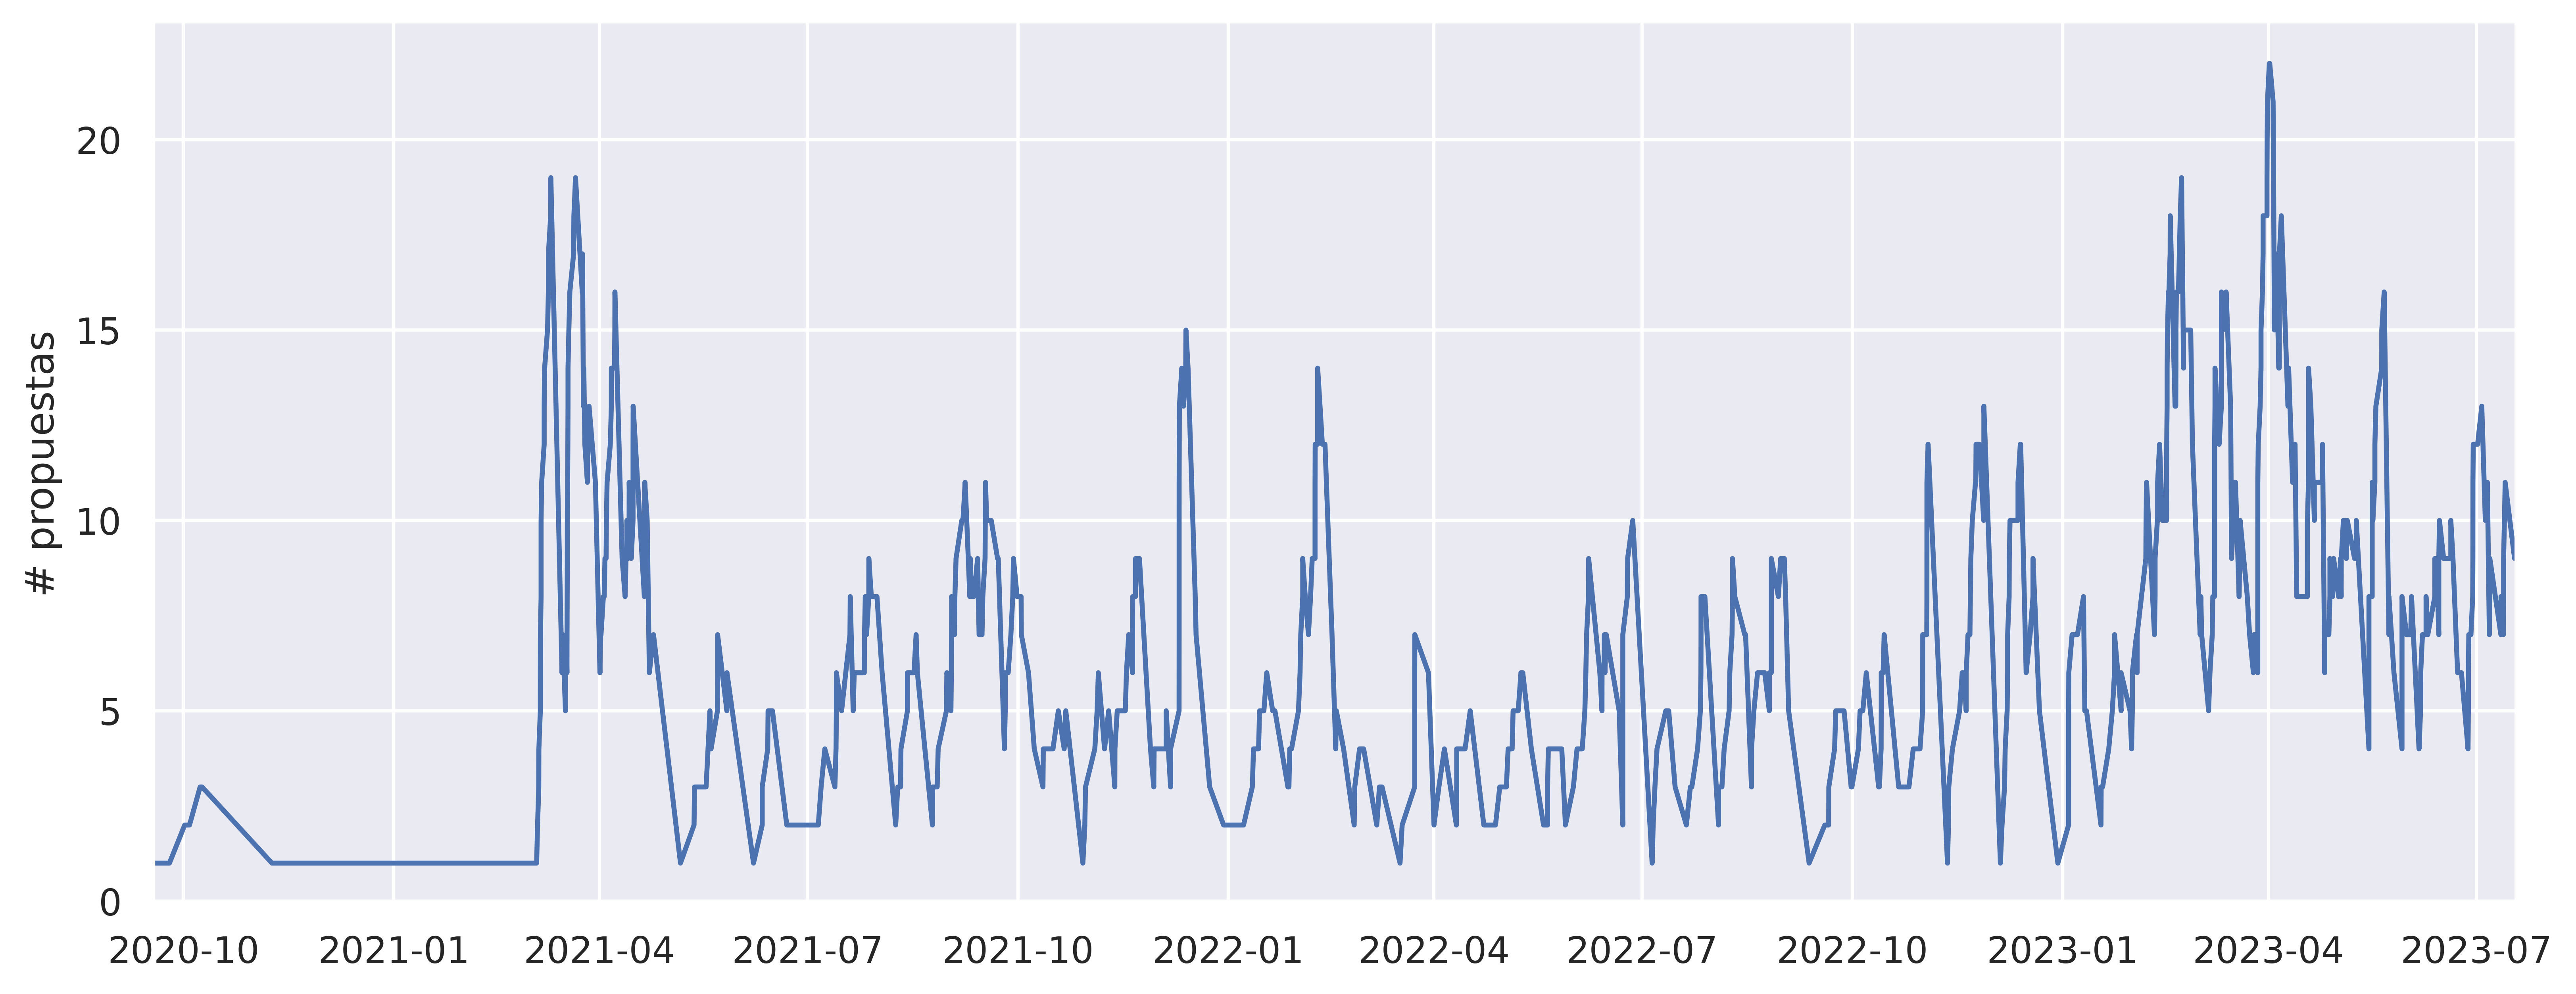

In [14]:
WINDOW_SIZE = '7D'

_toplot = dfv.groupby('proposal')['date'].min().sort_values()
_toplot = _toplot.to_frame()
_toplot['cnt'] = 1
_toplot = _toplot.rolling(window=WINDOW_SIZE, on='date').count()

# Double the width of the figure
fs = plt.gcf().get_size_inches()
plt.figure(figsize=(fs[0]*2, fs[1]))
# _toplot.set_index('date')['cnt'].plot()
ax = sns.lineplot(_toplot.set_index('date')['cnt'])

plt.xlabel('')
plt.ylabel('# propuestas')
plt.xlim(
    _toplot['date'].min(),
    _toplot['date'].max(),
)

sns.despine()
nbutils.download_matplotlib(ax.figure, f'04c_rolling_proposals_{WINDOW_SIZE}_{ORG_NAME}.pdf')

## Dia de la semana en que se votan las propuestas

> incluso, se podría hacer un heatmap X cuando se lanzan Y cuando se votan y Z (color) la frecuencia
> -- Javi

Vamos, que en esta celda vamos a intentar hacer un HEATMAP donde:
- X: dia de la semana de creación de la propuesta
- Y: dia de la semana de votación
- Z: número de votos

In [15]:
_toplot.to_numpy()

array([[Timestamp('2020-09-17 18:50:14'), 1.0],
       [Timestamp('2020-09-24 21:31:55'), 1.0],
       [Timestamp('2020-10-01 13:28:02'), 2.0],
       ...,
       [Timestamp('2023-07-13 06:42:10'), 10.0],
       [Timestamp('2023-07-13 14:02:20'), 11.0],
       [Timestamp('2023-07-17 16:44:59'), 9.0]], dtype=object)

Text(277.49999999999994, 0.5, 'Día votación')

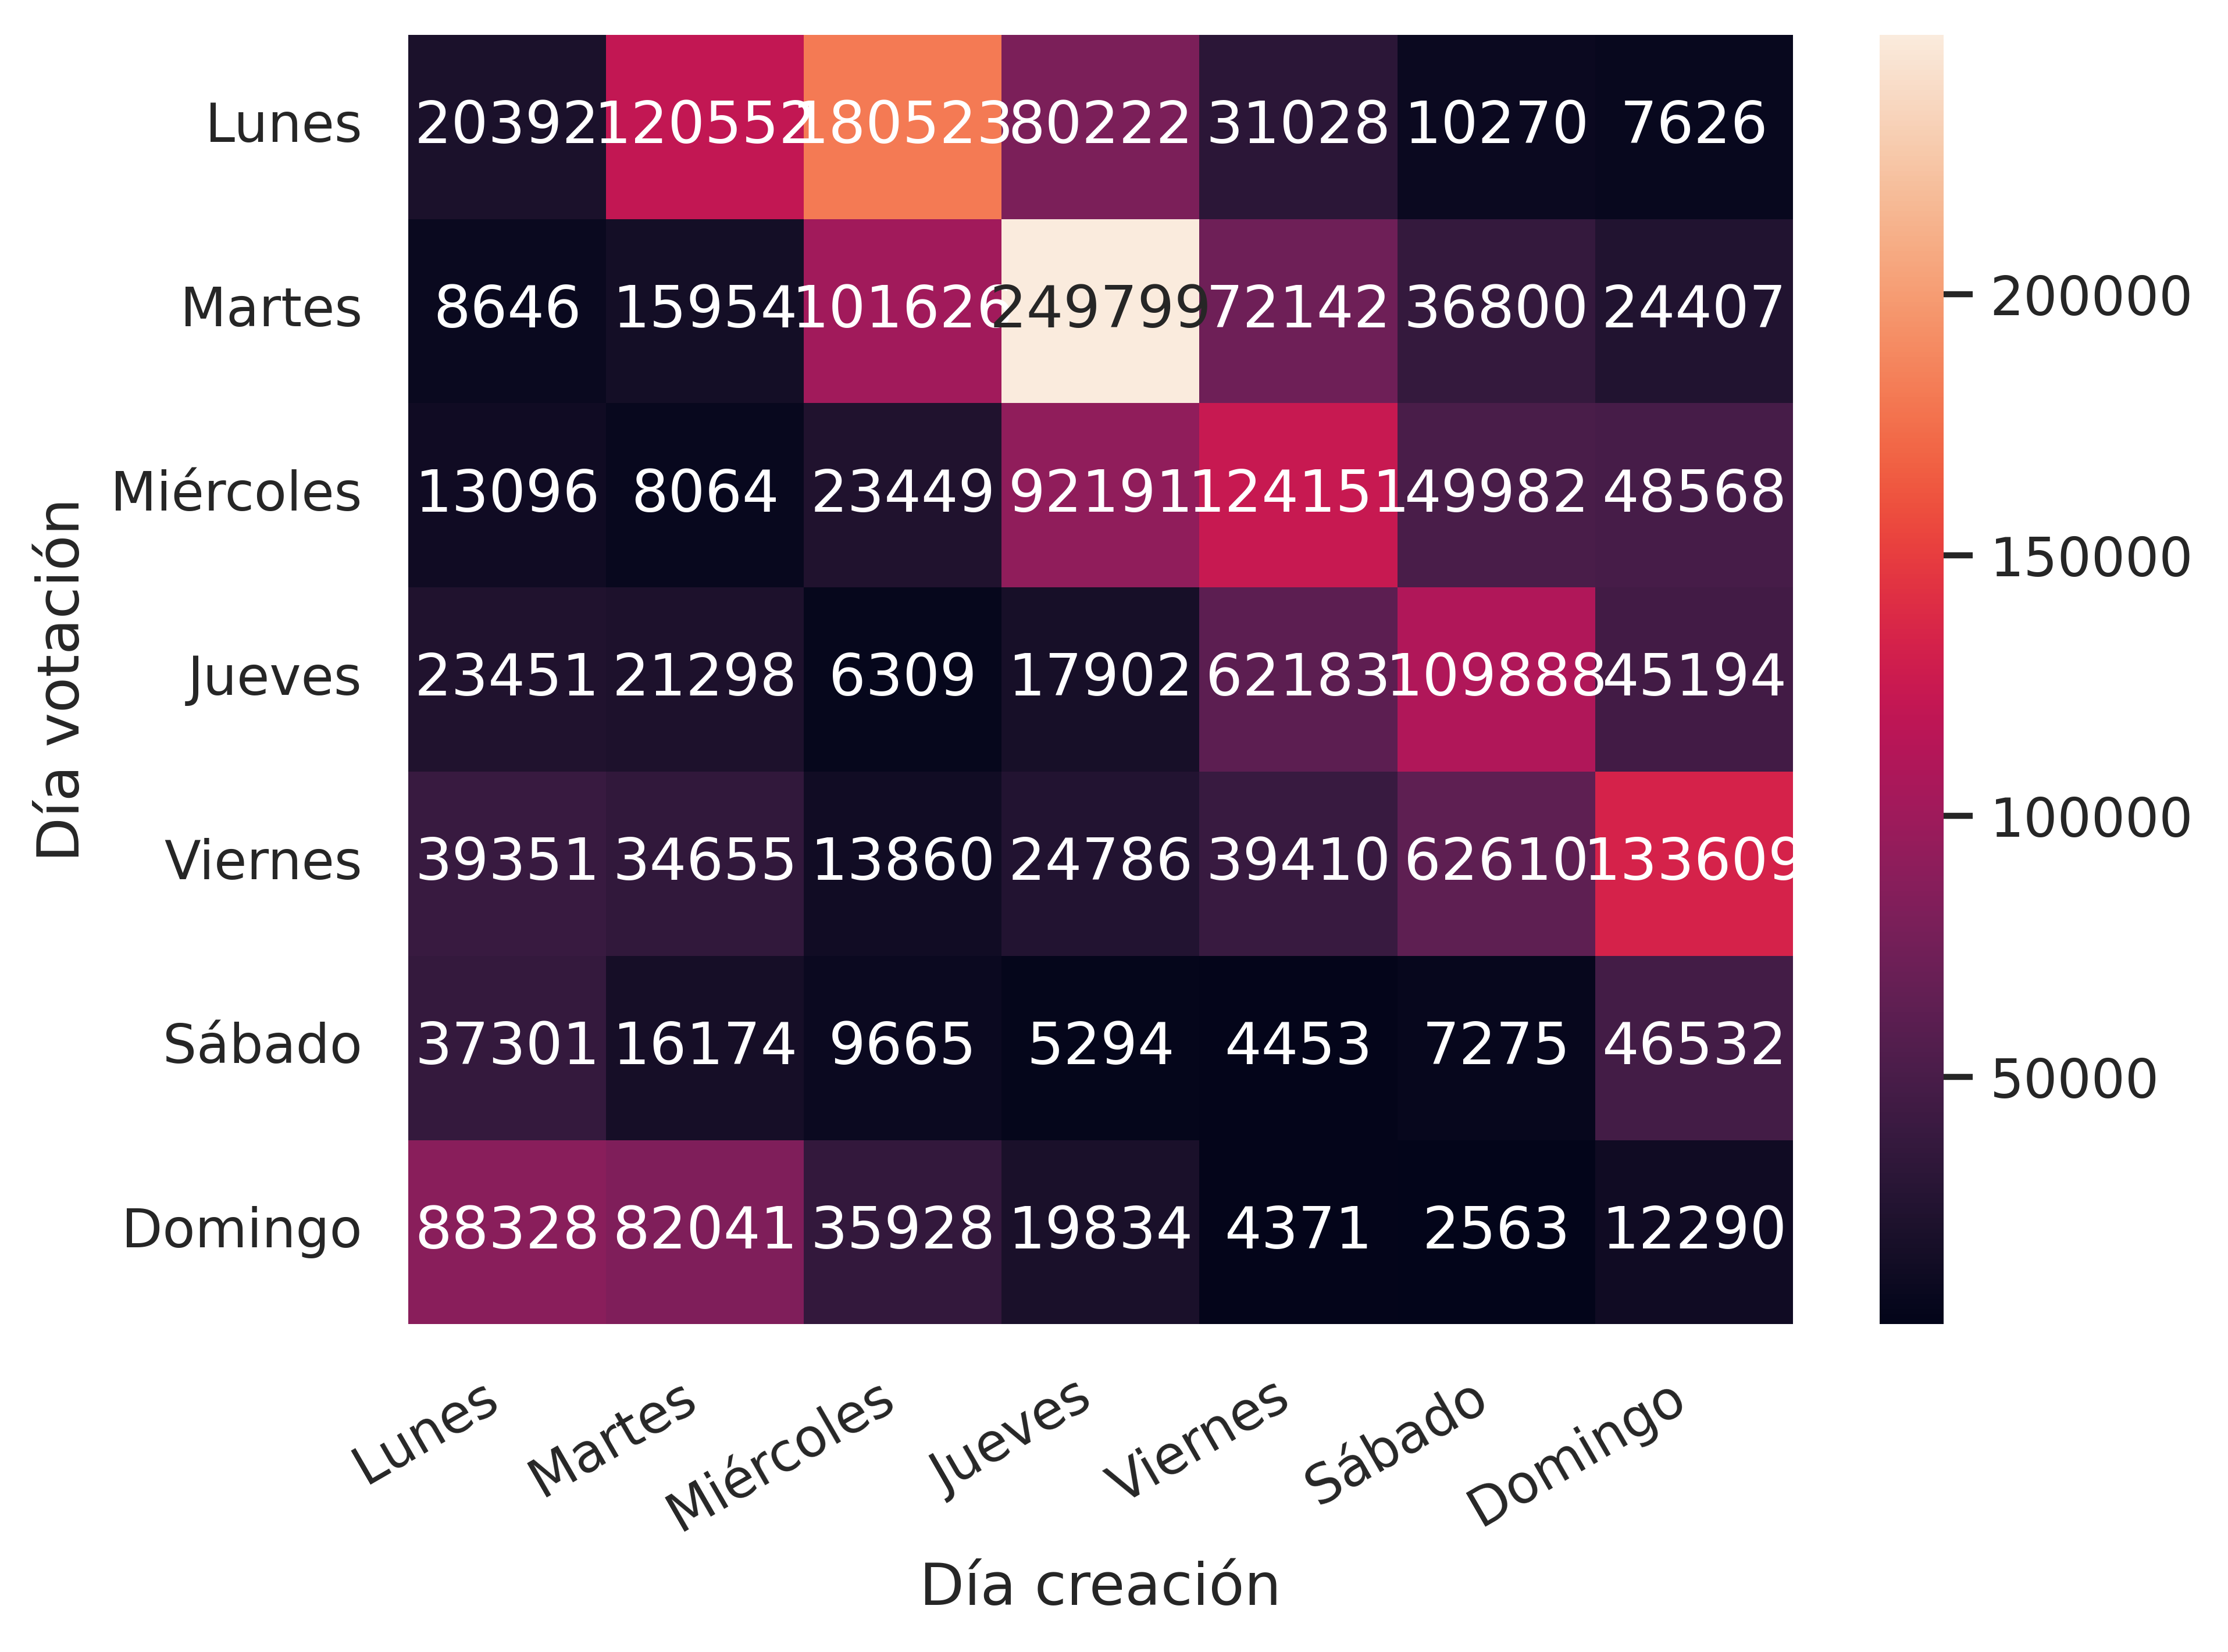

In [16]:
# In pandas, 0 = Monday
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html

spanish_dow = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sábado',
    6: 'Domingo',
}

_dfvp = dfv.merge(dfp['date'].rename('proposal_date'), left_on='proposal', right_index=True)
_dfvp['date_dow'] = _dfvp['date'].dt.day_of_week
_dfvp['proposal_date_dow'] = _dfvp['proposal_date'].dt.dayofweek
# sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
_toplot = pd.crosstab(_dfvp['proposal_date_dow'], _dfvp['date_dow']).rename(index=spanish_dow, columns=spanish_dow)

sns.heatmap(_toplot, annot=True, fmt='g')
plt.xticks(rotation=30, ha='right')

plt.xlabel('Día creación')
plt.ylabel('Día votación')

Cannot show ipywidgets in text

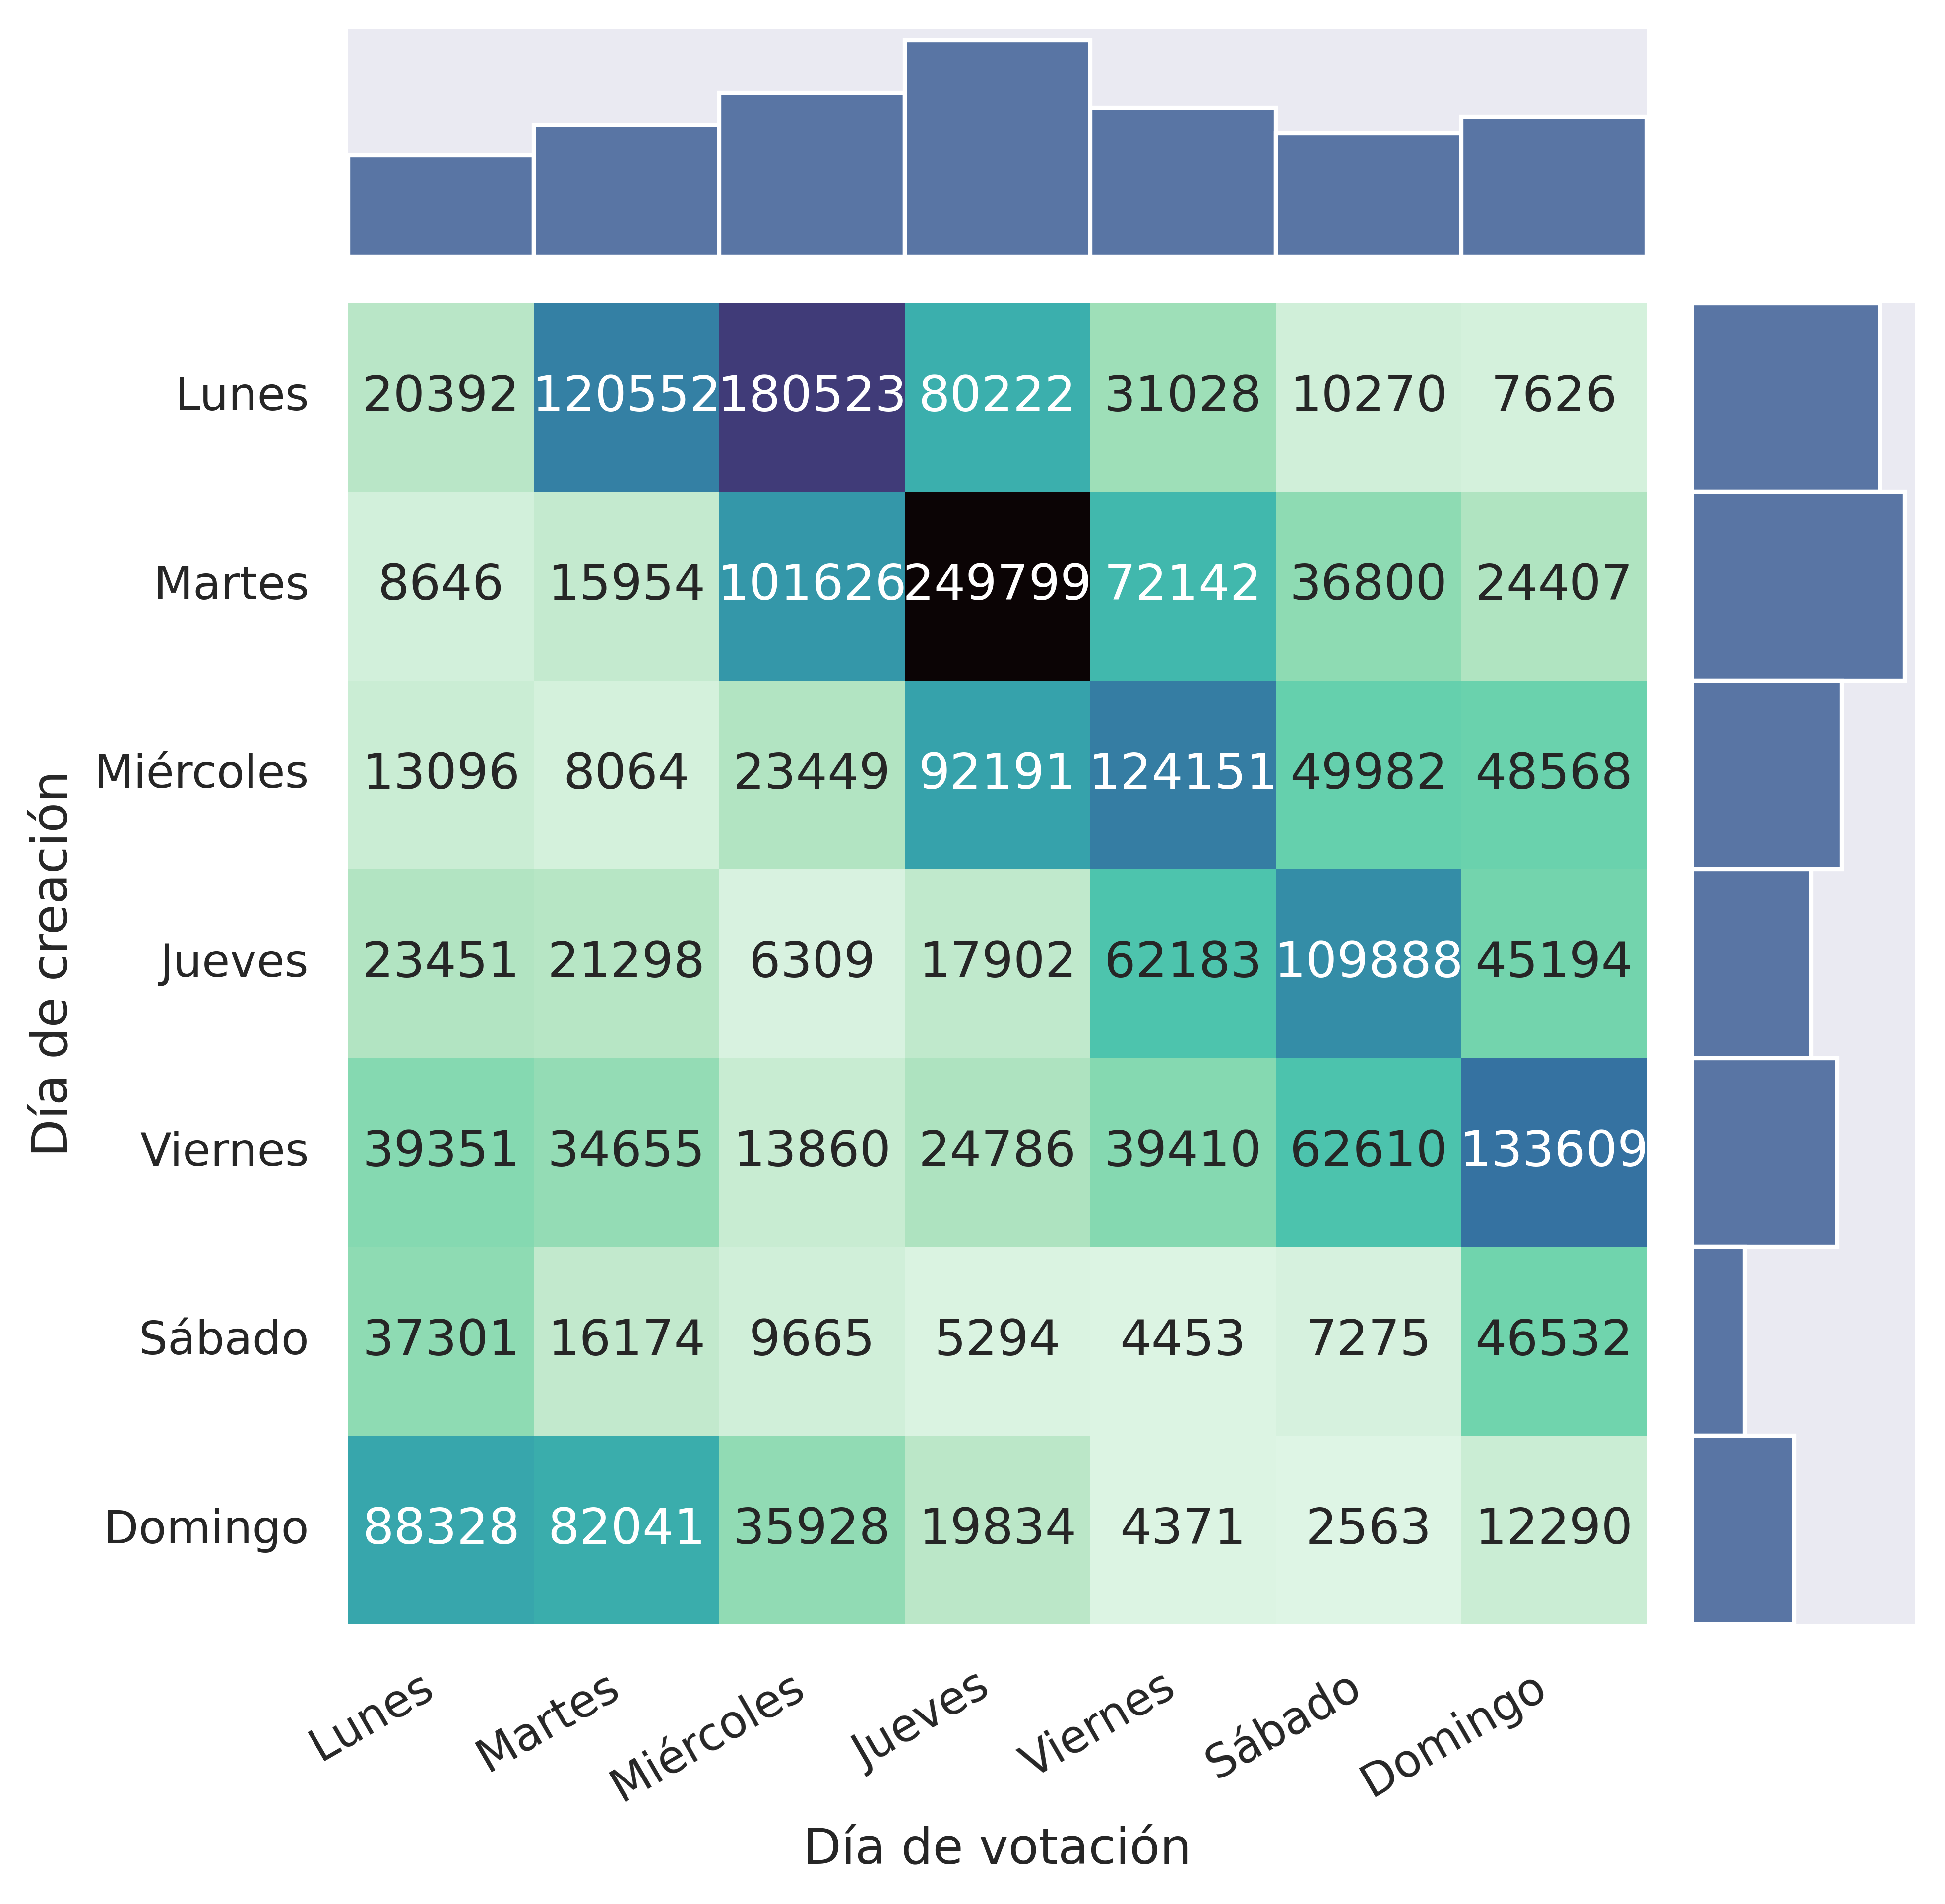

In [17]:
# _toplot = pd.crosstab(...)

grid = sns.JointGrid()

sns.heatmap(_toplot, ax=grid.ax_joint, cbar=False, annot=True, fmt='g', cmap='mako_r')
sns.barplot(_toplot.sum(), ax=grid.ax_marg_x, width=1)
sns.barplot(_toplot.sum(axis=1), ax=grid.ax_marg_y, orient='h', width=1)
_off = .5

# Fix x
_xmin, _xmax = grid.ax_joint.get_xlim()
grid.ax_joint.set_xlim(_xmin+_off, _xmax+_off)
for bar in grid.ax_marg_x.containers[0]:
    bar.set_x(bar.get_x() + _off)

# Fix y
_ymin, _ymax = grid.ax_joint.get_ylim()
grid.ax_joint.set_ylim(_ymin+_off, _ymax+_off)
for bar in grid.ax_marg_y.containers[0]:
    bar.set_y(bar.get_y() + _off)

grid.ax_joint.set_xticklabels(grid.ax_joint.get_xticklabels(), rotation=30, ha='right')
grid.ax_joint.yaxis.set_tick_params(rotation=0)

grid.ax_joint.set_xlabel('Día de votación')
grid.ax_joint.set_ylabel('Día de creación')

nbutils.download_matplotlib(grid, f'04c_heatmap_proposals_{ORG_NAME}.pdf')

<Axes: xlabel='proposal_date_dow', ylabel='count'>

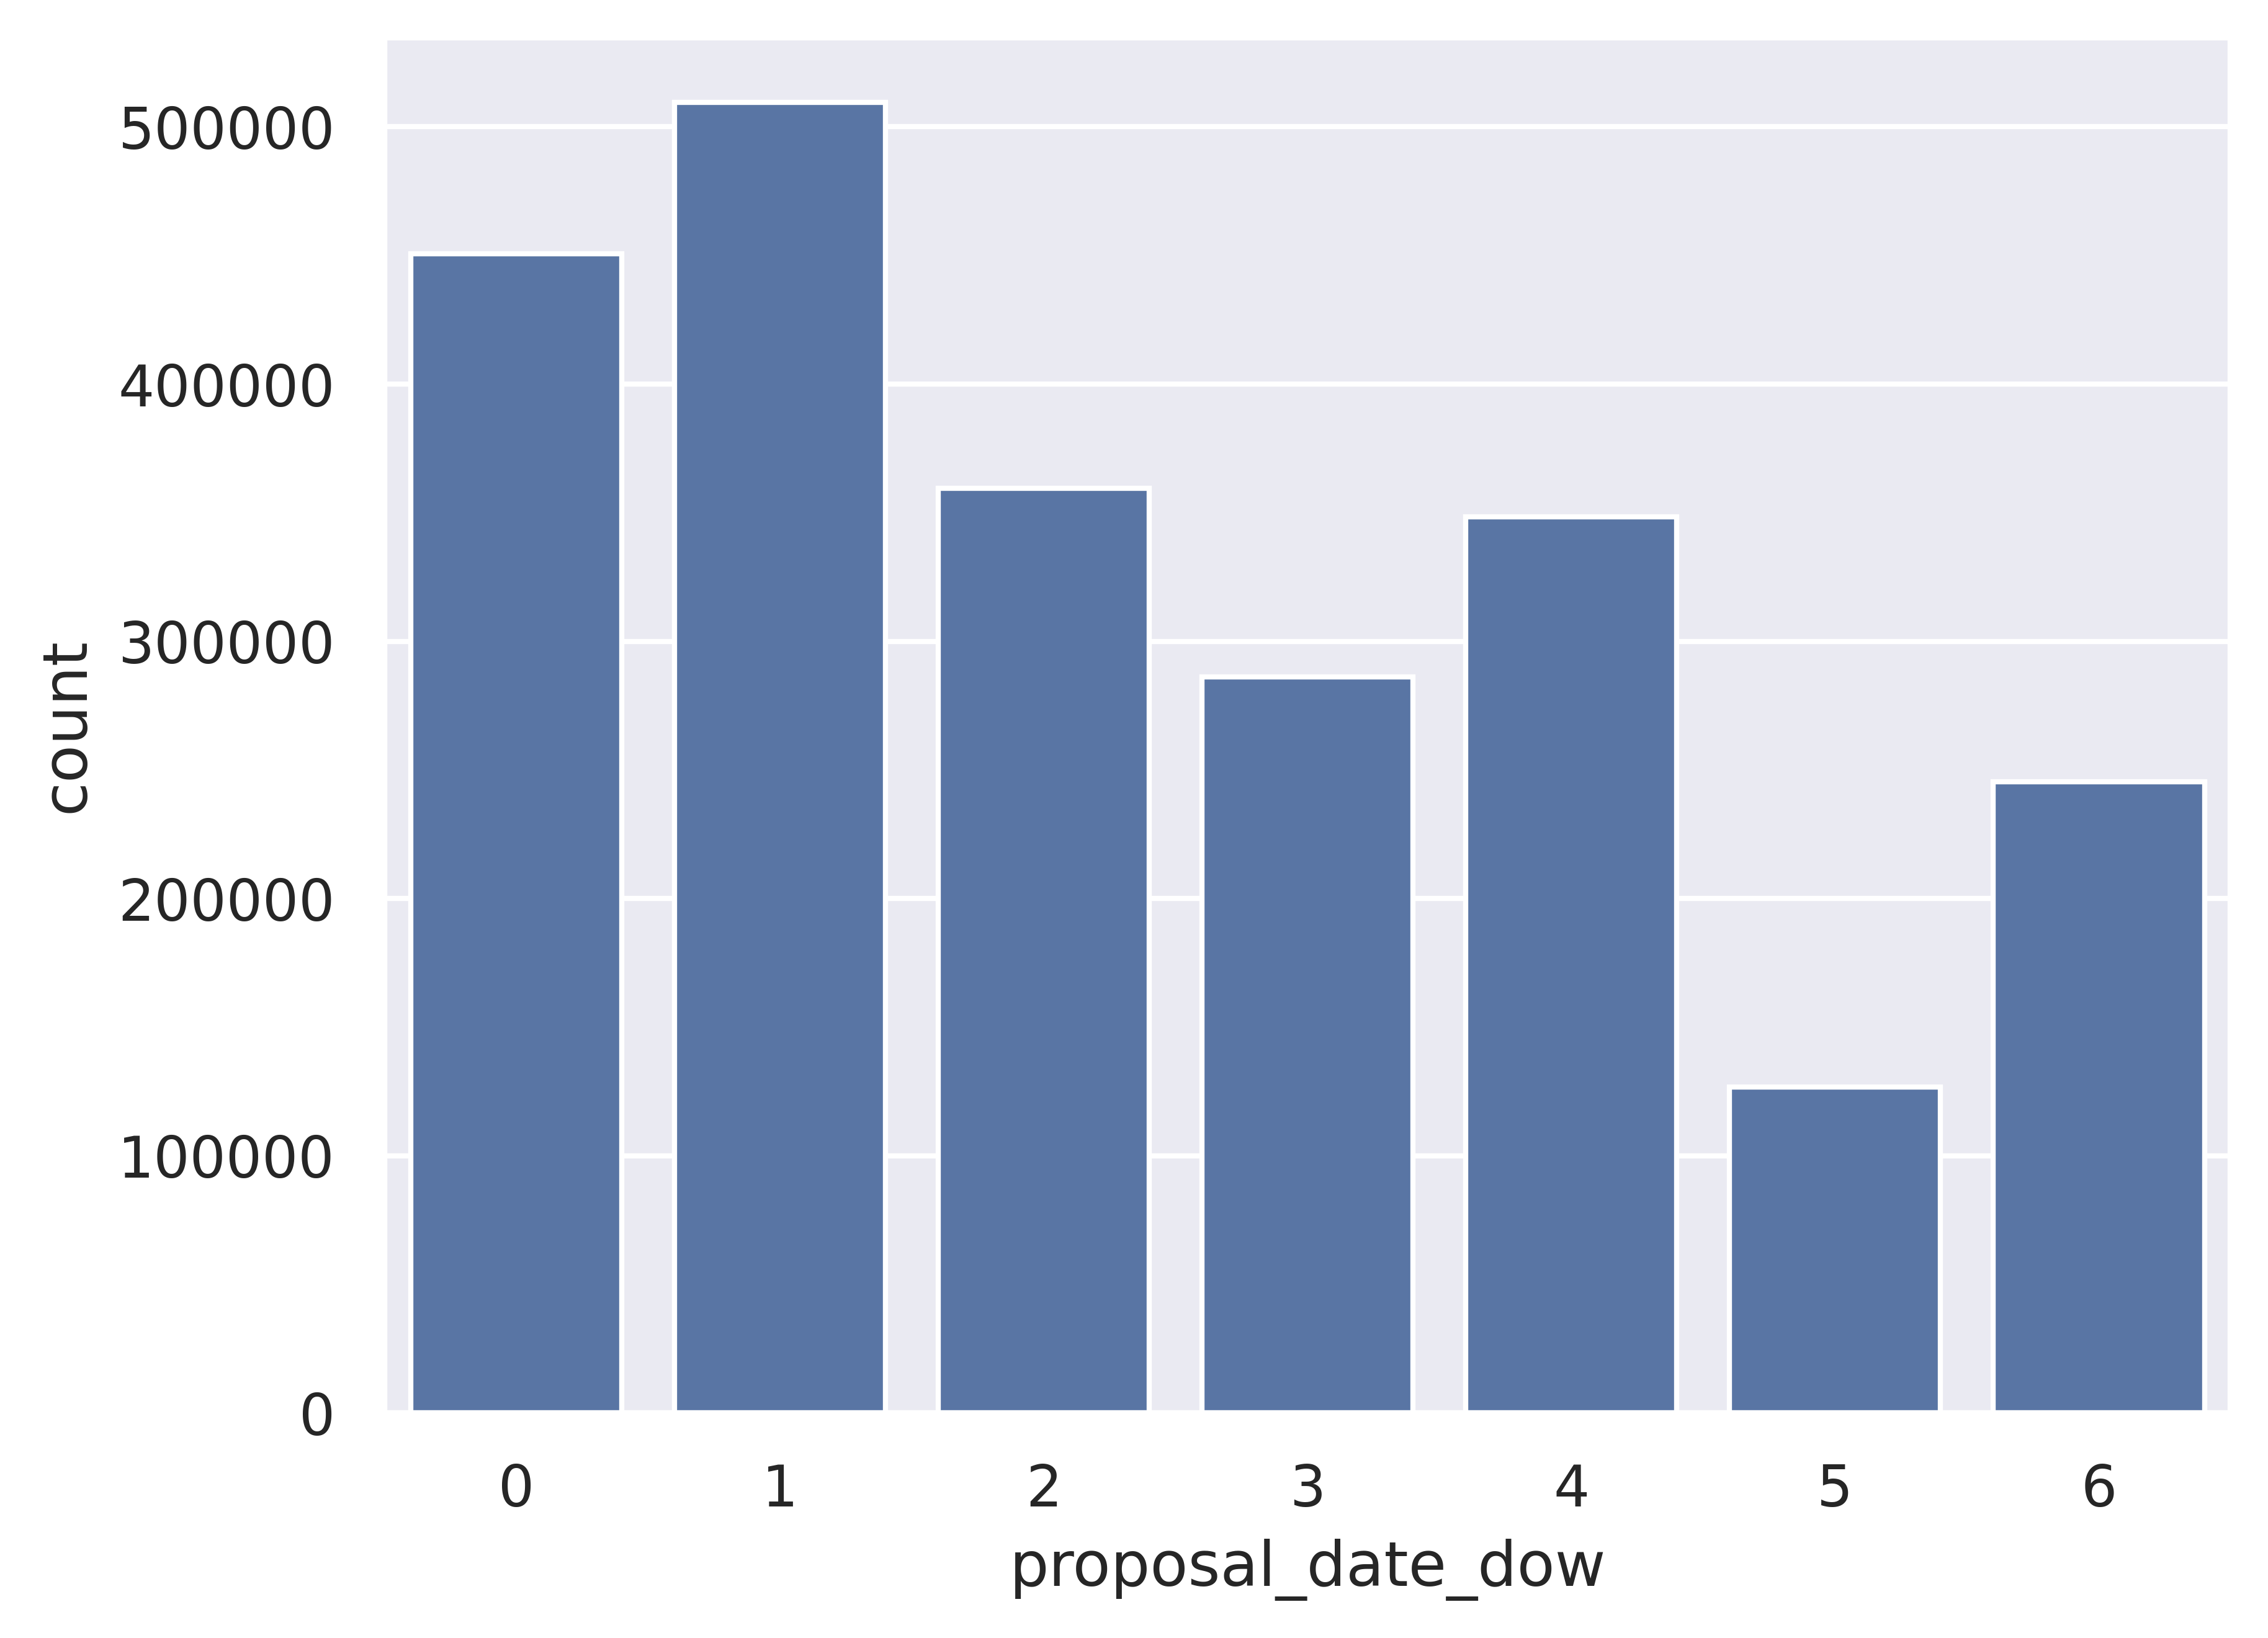

In [18]:
sns.countplot(_dfvp, x='proposal_date_dow')

<Axes: xlabel='count', ylabel='date_dow'>

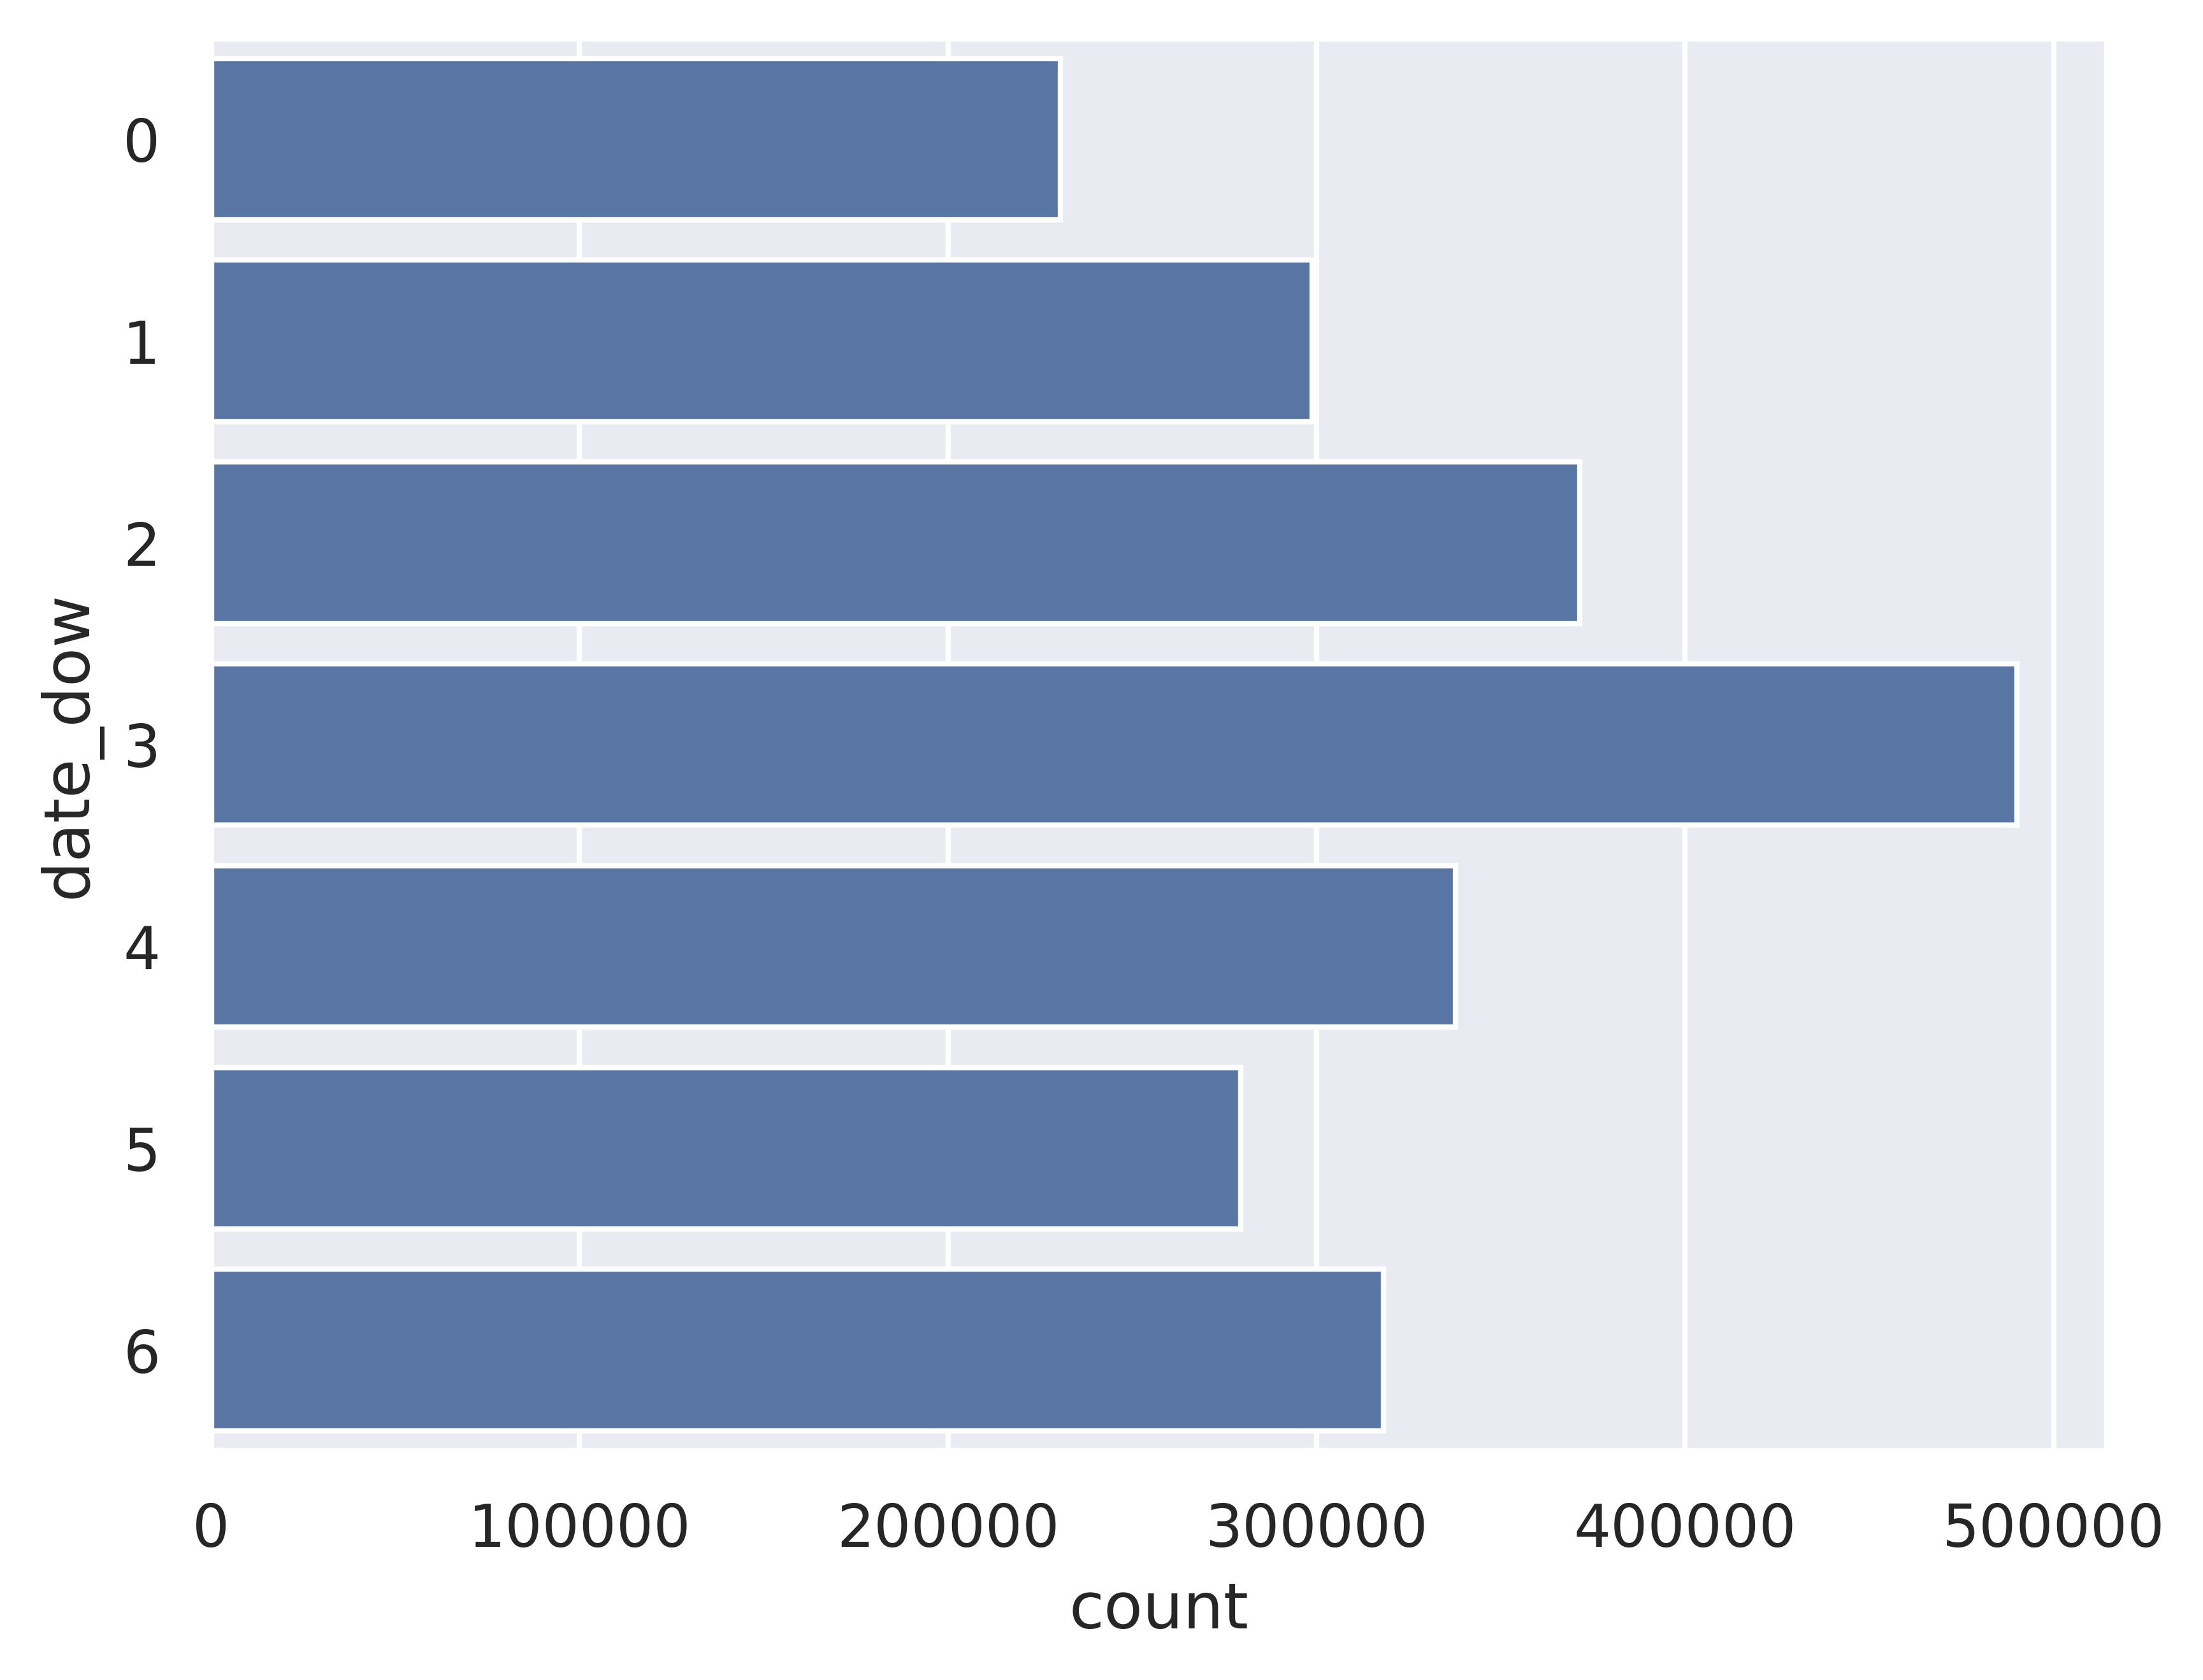

In [19]:
sns.countplot(_dfvp, y='date_dow')

## Suelen votarse las propuestas al principio o al final

In [20]:
def proposal_histogram(proposal):
    p = dfp.loc[proposal]
    _aux = dfv[dfv["proposal"] == proposal][['platform', 'name', 'date']].copy().sort_values('date')
    first_vote = p['start']
    last_vote = p['end']
    print(p['start'], p['end'], p['end'] - p['start'])
    _aux['date_rel'] = (_aux['date'] - p['start']) / (p['end'] - p['start'])
    # sns.ecdfplot(_aux['date_rel'])
    ax = sns.histplot(_aux['date_rel'])
    ax.set_title(f"Histograma de tiempo de los votos en la propuesta {proposal}")
    return ax

# proposal_histogram(proposal = "b86aa059-3d31-5d41-a472-70962816f779")

## Ahora para TODOS los votos

Cuidado que este grafo puede estar sesgado por una sola propuesta

In [21]:
dfp

platform               name  \
id                                                                  
895484e8-e4b3-59ff-841a-1a2700af3497  snapshot  Aave - Aavegotchi   
e8bc9aea-0d6d-5c31-a633-18185851530f  snapshot  Aave - Aavegotchi   
43c21551-66a1-524c-8029-b15fe809bd64  snapshot  Aave - Aavegotchi   
a89b8ee3-12c7-5509-937b-65d2155fcc32  snapshot  Aave - Aavegotchi   
12d5b83a-d28a-5bb5-ba4d-cdef0e1fb5aa  snapshot  Aave - Aavegotchi   
...                                        ...                ...   
8e24d806-618f-5a7b-9fb2-eae72ee8ec6f  snapshot  Aave - Aavegotchi   
0c01f20d-04d9-5c2e-ba40-b1d6232b2f90  snapshot  Aave - Aavegotchi   
10c339ed-7969-5109-9fd1-1fadbde119b0  snapshot  Aave - Aavegotchi   
1ccd74df-8734-582e-93e0-adc019412346  snapshot  Aave - Aavegotchi   
25efc708-125c-50dd-afaa-25400a8ec266  snapshot  Aave - Aavegotchi   

                                     platform_deployment  \
id                                                         
895484e8-e4b3-59ff-841a-1a2700af3497      aavegotchi.eth   
e8bc9aea-0d6d-5c31-a633-18185851530f      aavegotchi.eth   
43c21551-66a1-524c-8029-b15fe809bd64            aave.eth   
a89b8ee3-12c7-5509-937b-65d2155fcc32            aave.eth   
12d5b83a-d28a-5bb5-ba4d-cdef0e1fb5aa            aave.eth   
...                                                  ...   
8e24d806-618f-5a7b-9fb2-eae72ee8ec6f      aavegotchi.eth   
0c01f20d-04d9-5c2e-ba40-b1d6232b2f90      aavegotchi.eth   
10c339ed-7969-5109-9fd1-1fadbde119b0      aavegotchi.eth   
1ccd74df-8734-582e-93e0-adc019412346      aavegotchi.eth   
25efc708-125c-50dd-afaa-25400a8ec266      aavegotchi.eth   

                                                                deployment  \
id                                                                           
895484e8-e4b3-59ff-841a-1a2700af3497  377e7181-37e0-504d-b494-d26df613abdc   
e8bc9aea-0d6d-5c31-a633-18185851530f  377e7181-37e0-504d-b494-d26df613abdc   
43c21551-66a1-524c-8029-b15fe809bd64  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
a89b8ee3-12c7-5509-937b-65d2155fcc32  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
12d5b83a-d28a-5bb5-ba4d-cdef0e1fb5aa  b6c95a58-d36d-5482-9fa0-fffbbed6e20a   
...                                                                    ...   
8e24d806-618f-5a7b-9fb2-eae72ee8ec6f  377e7181-37e0-504d-b494-d26df613abdc   
0c01f20d-04d9-5c2e-ba40-b1d6232b2f90  377e7181-37e0-504d-b494-d26df613abdc   
10c339ed-7969-5109-9fd1-1fadbde119b0  377e7181-37e0-504d-b494-d26df613abdc   
1ccd74df-8734-582e-93e0-adc019412346  377e7181-37e0-504d-b494-d26df613abdc   
25efc708-125c-50dd-afaa-25400a8ec266  377e7181-37e0-504d-b494-d26df613abdc   

                                                                      platform_proposal  \
id                                                                                        
895484e8-e4b3-59ff-841a-1a2700af3497  0xfa99468d3de270ad12ae805651cae5b7a2a52ac3f1e0...   
e8bc9aea-0d6d-5c31-a633-18185851530f  0x1399095d33be4ea641e5781dfcf290bf1ca9d4248be9...   
43c21551-66a1-524c-8029-b15fe809bd64  bafkreieeyh6pbqwhgryo6v67oxlmnfhaptrgkc3u7y6bv...   
a89b8ee3-12c7-5509-937b-65d2155fcc32  0xf4a0e440e08d44f45aa691d038fd40cf3e3306247610...   
12d5b83a-d28a-5bb5-ba4d-cdef0e1fb5aa  0x9f65a598bee69a1dd84127d712ffedbc0795f0647e89...   
...                                                                                 ...   
8e24d806-618f-5a7b-9fb2-eae72ee8ec6f     QmSccnEb7Hgb1qkLxLfGnKoPSFmJw5YRonMSyoHqrikv5f   
0c01f20d-04d9-5c2e-ba40-b1d6232b2f90     Qmdc3Y5ybweYsyvq8Cv44kc12ZTXG4U9W6PW6YAC5Nm2hw   
10c339ed-7969-5109-9fd1-1fadbde119b0     Qmb6JpQsdcPwBJ3LgLMVUu9g941n7bMnojRrviRBGG3hRb   
1ccd74df-8734-582e-93e0-adc019412346     QmekS8cat4EUeygnkUKqRGcF2D3N7mm3ctWQhYsqLEJr4H   
25efc708-125c-50dd-afaa-25400a8ec266     QmRPsZJ1YQMbfdG1fD8udgybxtPivLDyW1wzzsm5V7GvRE   

                                                                          author  \
id                                                                          

Text(0.5, 1.0, 'Histograma de todos los votos realizados en Aave - Aavegotchi')

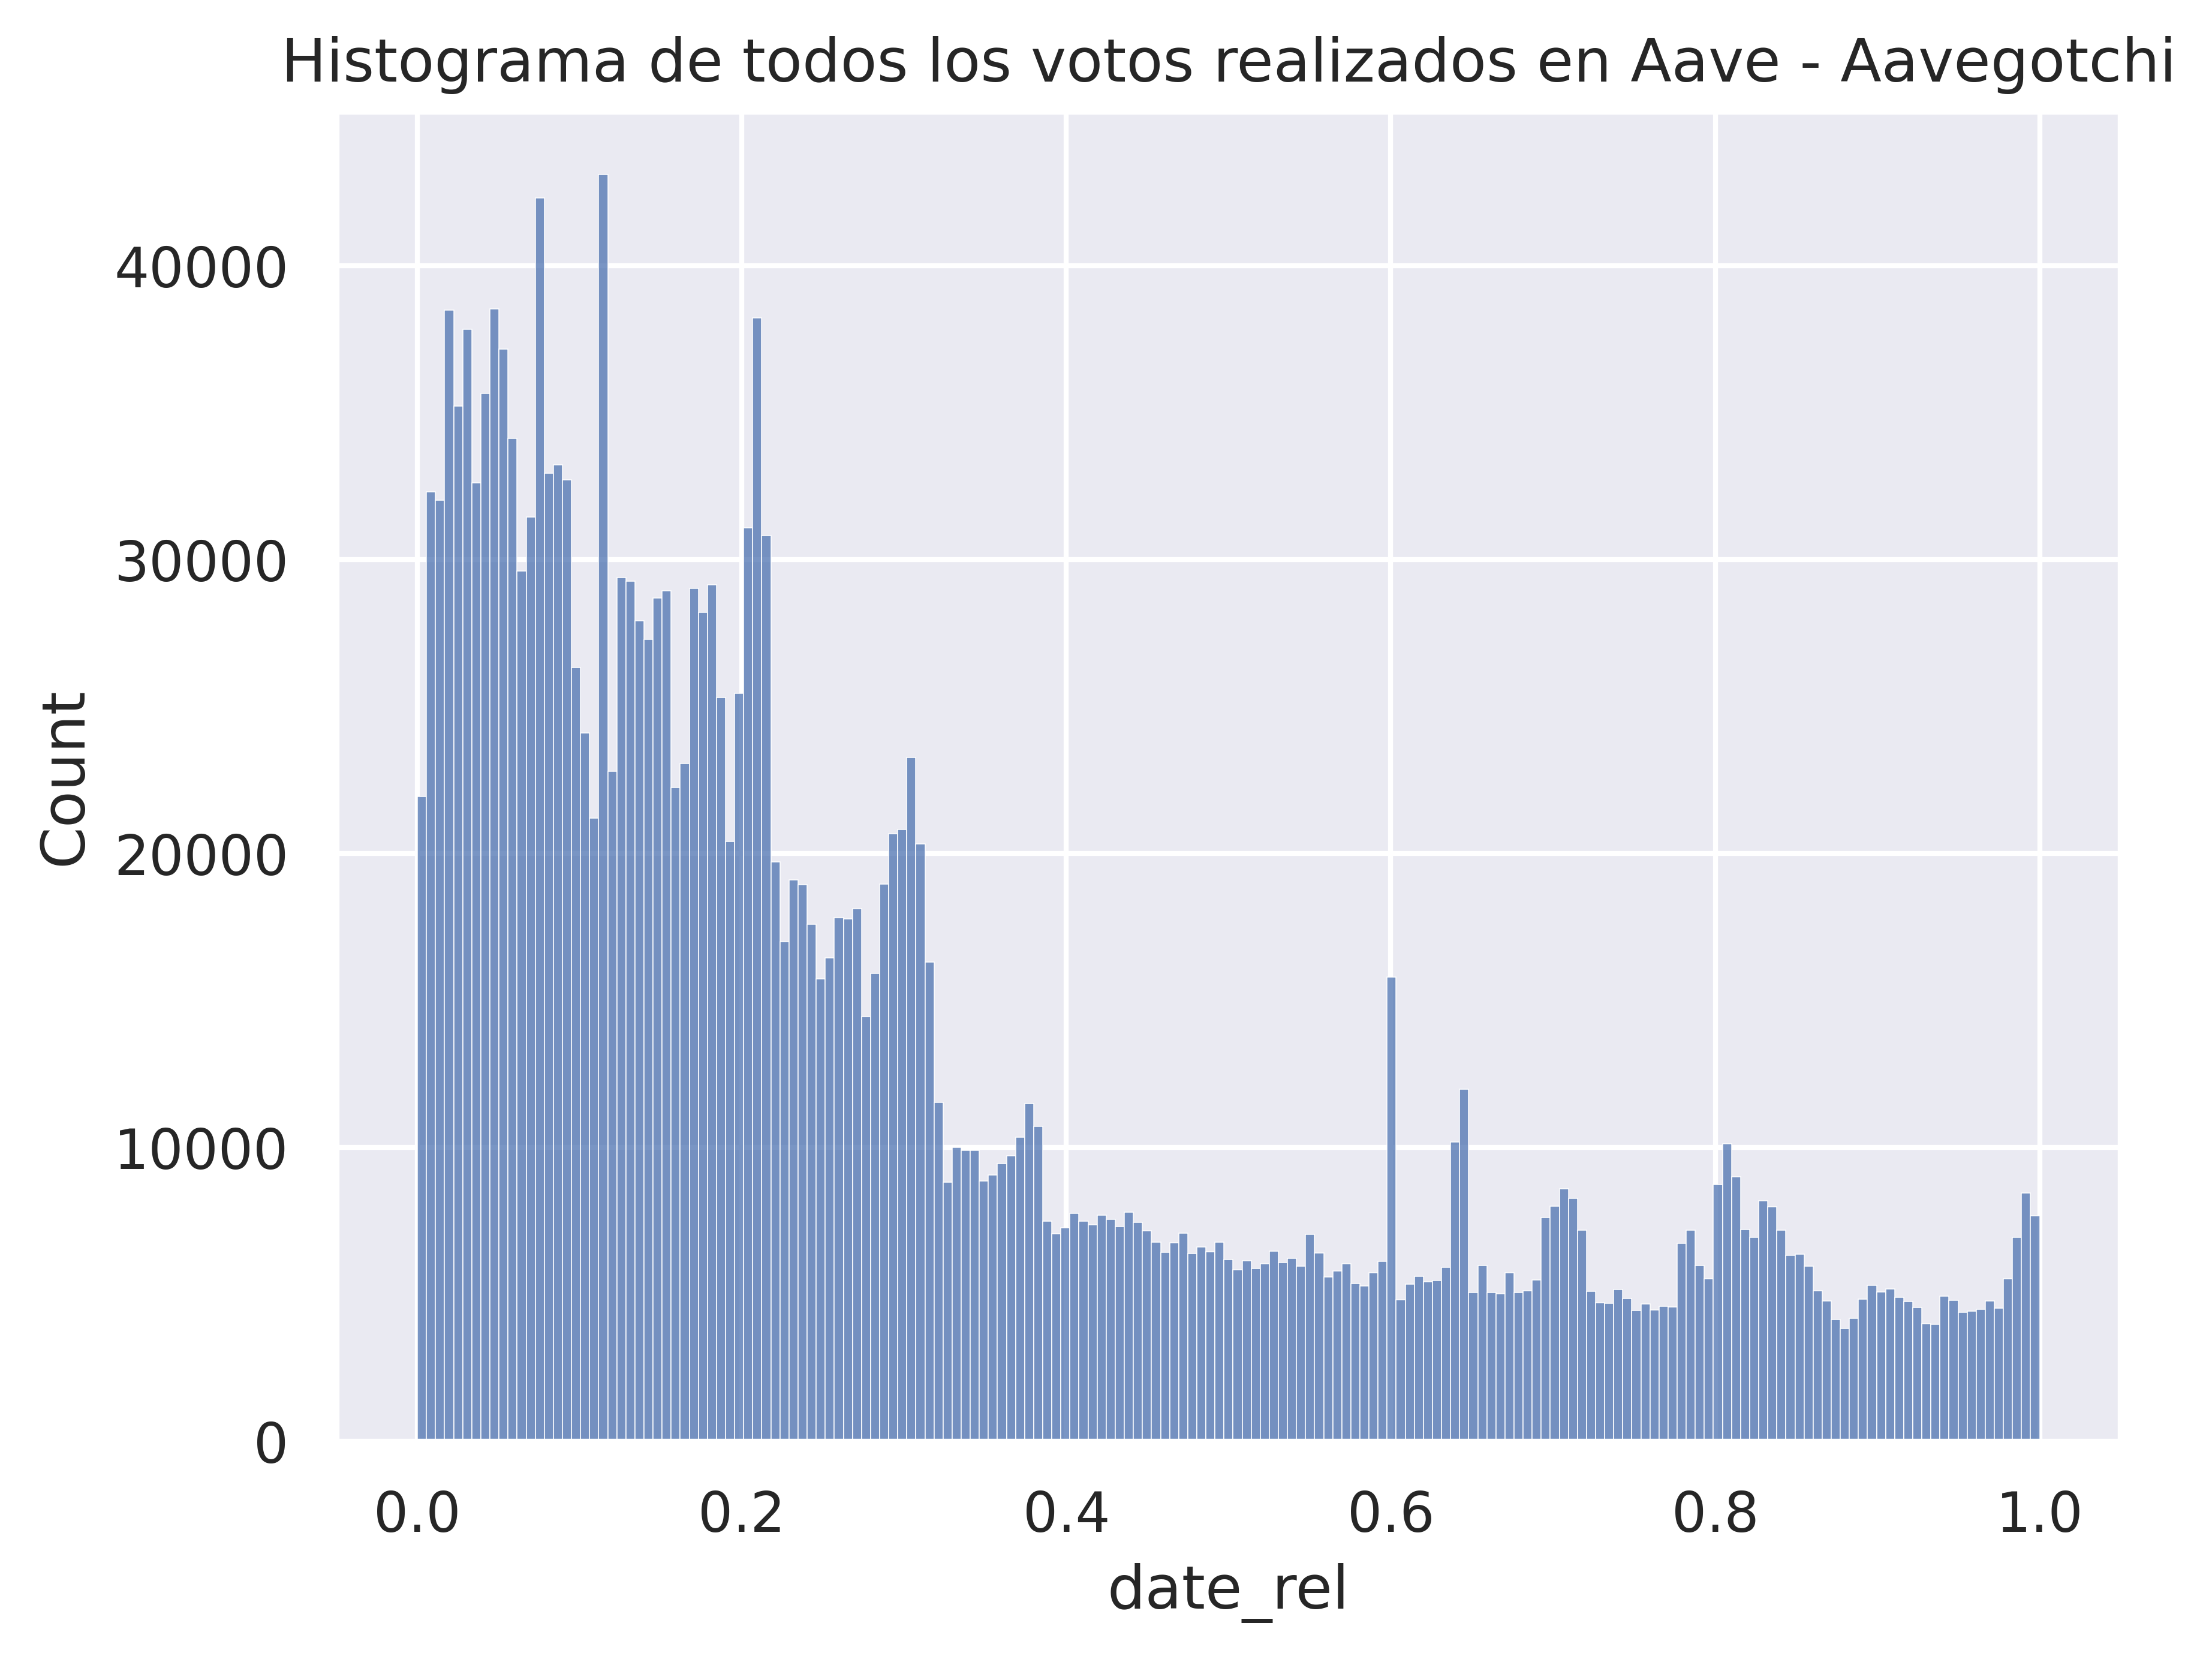

In [22]:
_dfv = dfv[['platform', 'name', 'proposal', 'date']].merge(dfp[['start', 'end']], left_on='proposal', right_index=True).sort_values('date')
_dfv['date_rel'] = (_dfv['date'] - _dfv['start']) / (_dfv['end'] - _dfv['start'])
ax = sns.histplot(_dfv, x='date_rel')
ax.set_title(f"Histograma de todos los votos realizados en {ORG_NAME}")

In [23]:
_dfv[['date_rel']].describe(percentiles=[.1,.25,.5,.75,.78,.8])

date_rel
count  2.326043e+06
mean   3.096696e-01
std    2.706797e-01
min    3.858025e-06
10%    3.945216e-02
25%    9.566609e-02
50%    2.128241e-01
75%    4.659086e-01
78%    5.269049e-01
80%    5.690278e-01
max    9.999971e-01

### Cuando son los votos (histograma distribución en tiempo de TODOS los votos)

Vamos a intentar calcular la frecuencia relativa acumulada

In [24]:
rel = (1 / _dfv.groupby('proposal').size()).rename('freq')
_dfv2 = _dfv.join(rel, on='proposal')
_dfv2['cumfreq'] = _dfv2.groupby('proposal')['freq'].cumsum()
_dfv2

platform               name                              proposal  \
532430  snapshot  Aave - Aavegotchi  69493095-ceef-5f56-9224-aa1b377173be   
532429  snapshot  Aave - Aavegotchi  69493095-ceef-5f56-9224-aa1b377173be   
532428  snapshot  Aave - Aavegotchi  69493095-ceef-5f56-9224-aa1b377173be   
532427  snapshot  Aave - Aavegotchi  69493095-ceef-5f56-9224-aa1b377173be   
532426  snapshot  Aave - Aavegotchi  69493095-ceef-5f56-9224-aa1b377173be   
...          ...                ...                                   ...   
677515  snapshot  Aave - Aavegotchi  a6bc61cd-cc0d-57f1-8c26-ecd7027eb461   
677516  snapshot  Aave - Aavegotchi  a6bc61cd-cc0d-57f1-8c26-ecd7027eb461   
677517  snapshot  Aave - Aavegotchi  a6bc61cd-cc0d-57f1-8c26-ecd7027eb461   
677518  snapshot  Aave - Aavegotchi  a6bc61cd-cc0d-57f1-8c26-ecd7027eb461   
677519  snapshot  Aave - Aavegotchi  a6bc61cd-cc0d-57f1-8c26-ecd7027eb461   

                      date               start                 end  date_rel  \
532430 2020-09-17 18:50:14 2020-09-17 02:40:00 2020-09-24 12:00:00  0.091187   
532429 2020-09-17 18:53:53 2020-09-17 02:40:00 2020-09-24 12:00:00  0.091530   
532428 2020-09-17 21:19:24 2020-09-17 02:40:00 2020-09-24 12:00:00  0.105207   
532427 2020-09-17 22:42:00 2020-09-17 02:40:00 2020-09-24 12:00:00  0.112970   
532426 2020-09-18 00:11:08 2020-09-17 02:40:00 2020-09-24 12:00:00  0.121347   
...                    ...                 ...                 ...       ...   
677515 2023-07-20 16:28:43 2023-07-17 16:44:05 2023-07-20 16:44:05  0.996443   
677516 2023-07-20 16:30:21 2023-07-17 16:44:05 2023-07-20 16:44:05  0.996821   
677517 2023-07-20 16:32:03 2023-07-17 16:44:05 2023-07-20 16:44:05  0.997215   
677518 2023-07-20 16:33:32 2023-07-17 16:44:05 2023-07-20 16:44:05  0.997558   
677519 2023-07-20 16:39:36 2023-07-17 16:44:05 2023-07-20 16:44:05  0.998962   

            freq   cumfreq  
532430  0.071429  0.071429  
532429  0.071429  0.142857  
532428  0.071429  0.214286  
532427  0.071429  0.285714  
532426  0.071429  0.357143  
...          ...       ...  
677515  0.000078  0.999687  
677516  0.000078  0.999765  
677517  0.000078  0.999843  
677518  0.000078  0.999922  
677519  0.000078  1.000000  

[2326043 rows x 9 columns]

In [25]:
_dfv2.groupby('proposal').size().sort_values()

proposal
b51eb1a7-42be-5ab3-b90d-fc542f63c80e        1
efa53e42-7e5d-5ef9-94b6-a8b949371980        3
1ccfd598-47a0-56fe-a6e7-6ad22d8e652c        8
ea520397-f9e6-5a10-97af-c1fb17de4853       12
b4380e3b-1758-5b05-81a4-a81b9e773a37       12
                                        ...  
b65344ef-84ff-5351-8d4c-1e51f5a17fa1    18379
c56a7c46-ae9c-537e-987a-e768d95d92f6    18546
97d5f7be-078d-520d-8b00-b0b880b743d6    18710
494ec2ea-bc55-5cff-bb01-3afeafbaf67d    18861
9fec3494-1418-528d-93be-5d1177aa0ab1    21321
Length: 719, dtype: int64


### KDE plot de las más votadas

Text(0.5, 1.0, 'kde plot de las 15 propuestas más grandes en Aave - Aavegotchi')

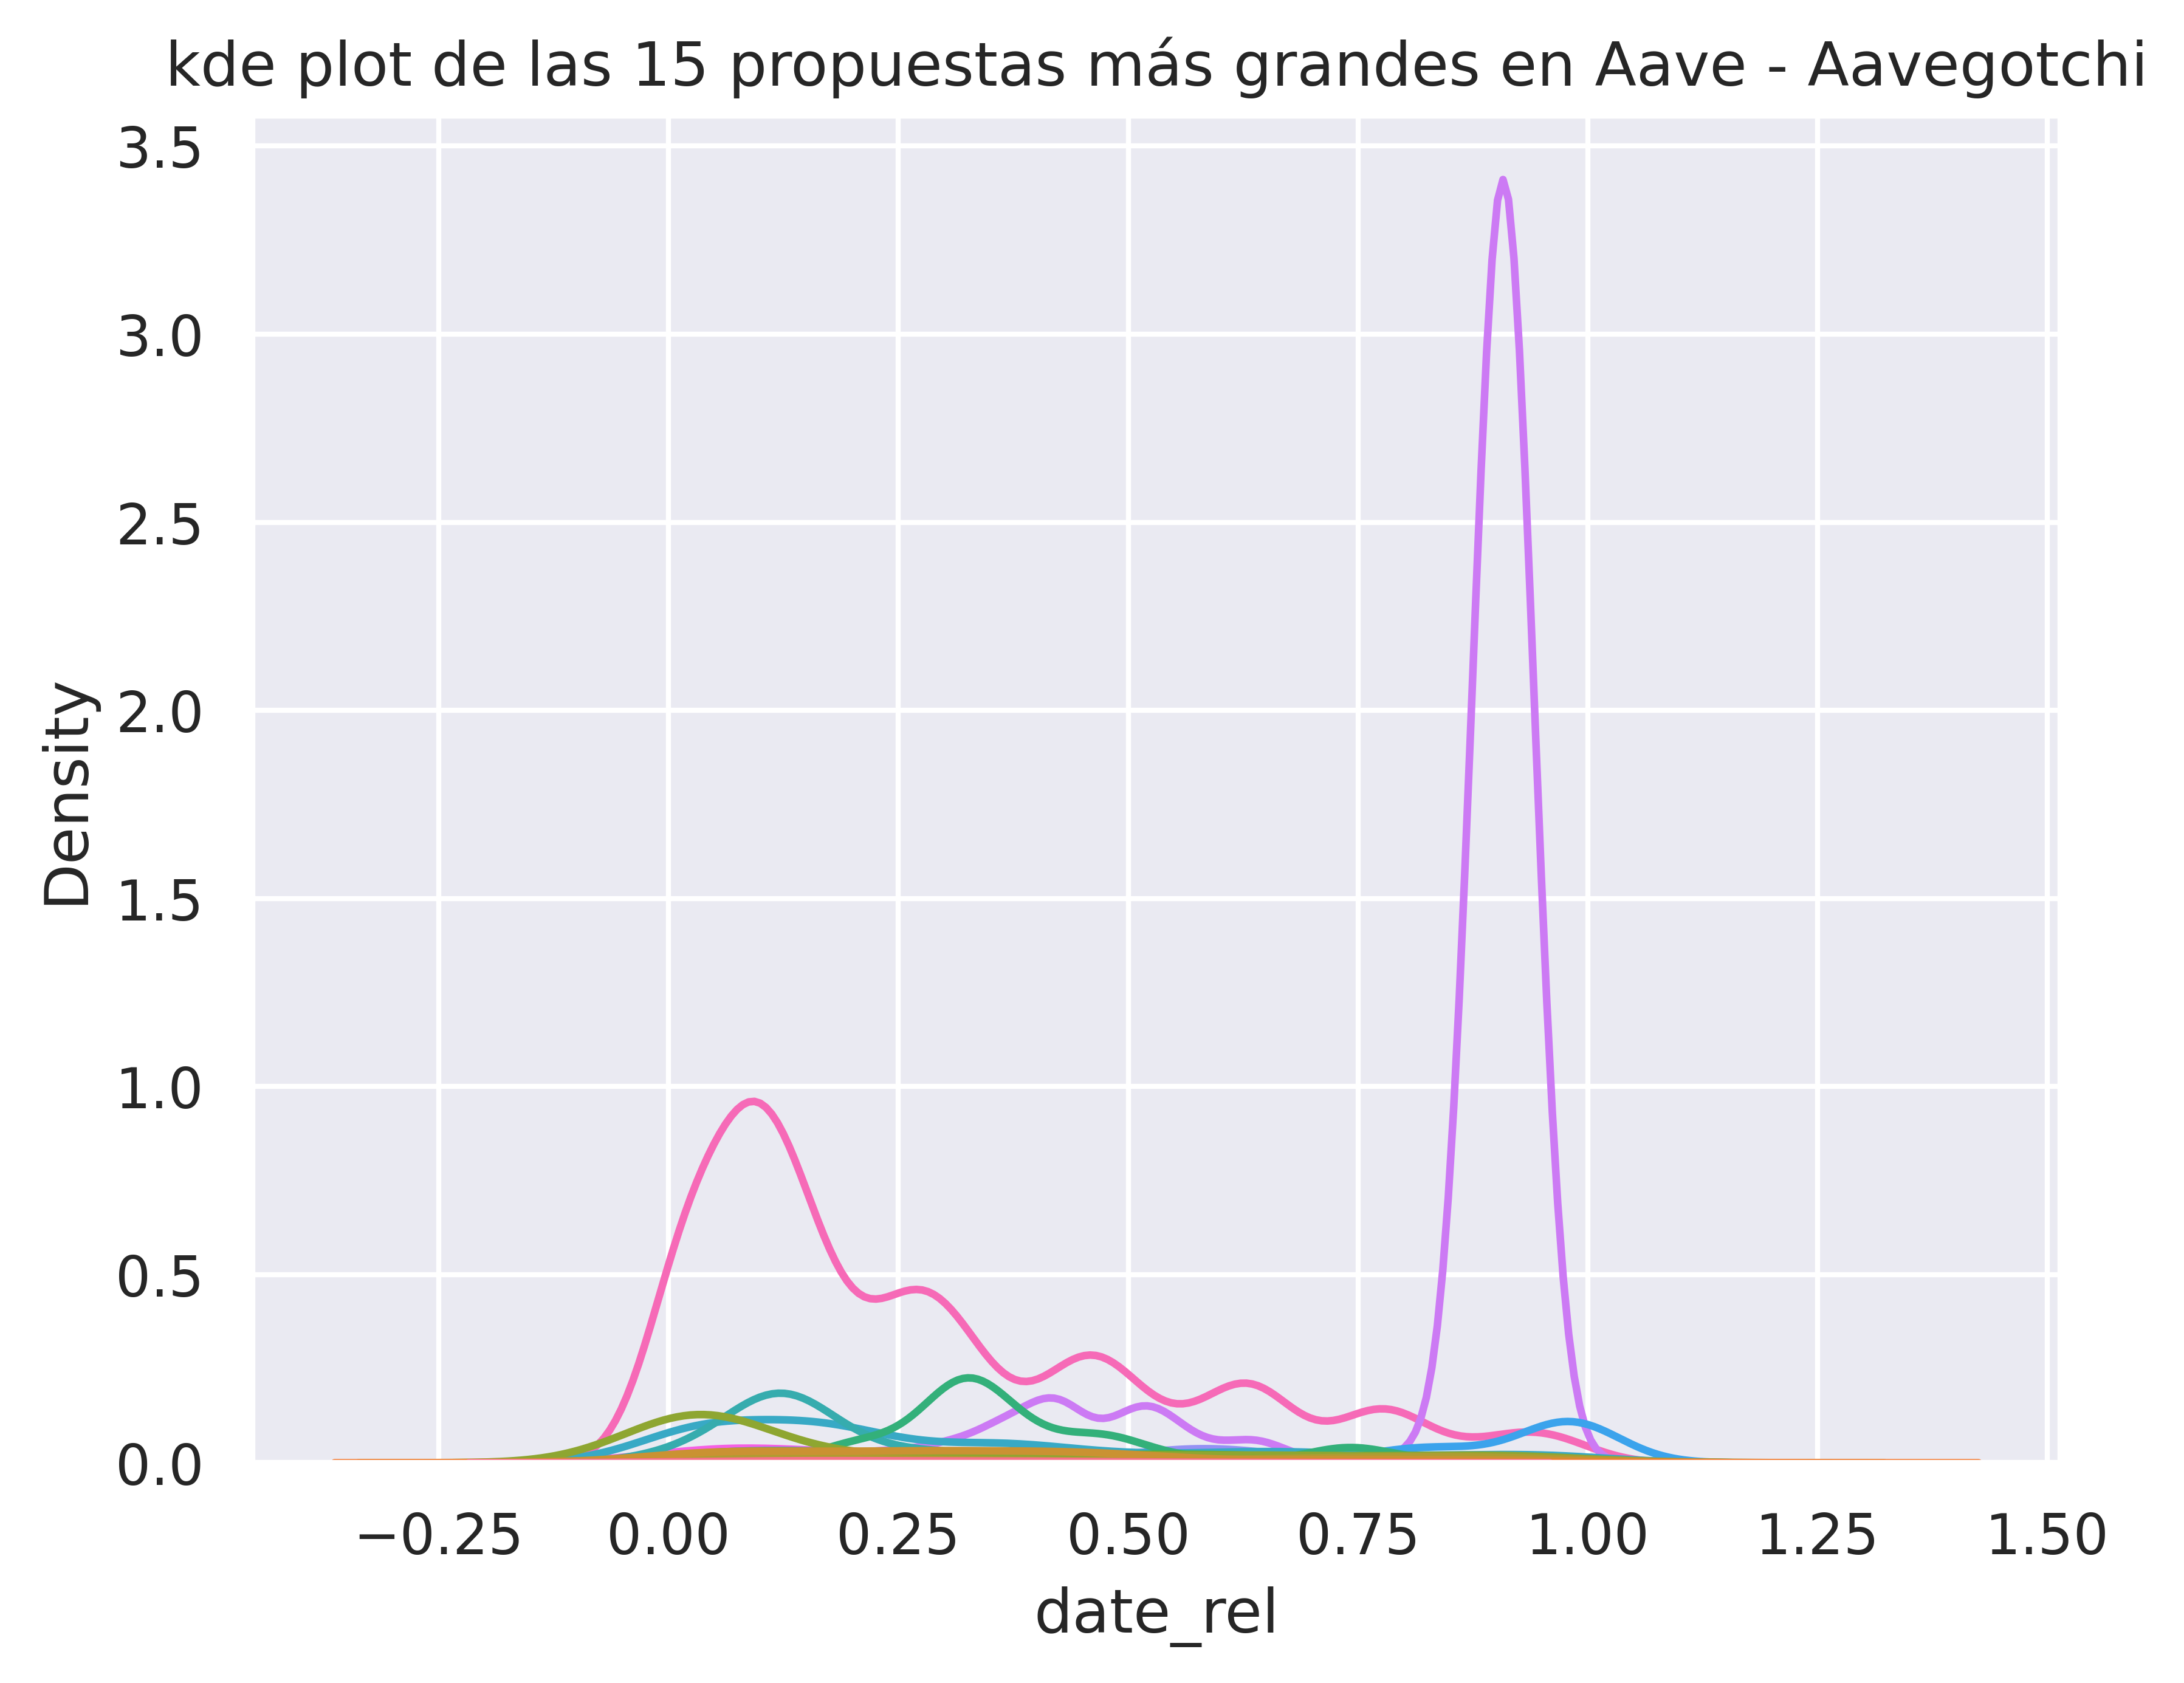

In [26]:
# Get N random proposals
# proposals = np.random.choice(_dfv2['proposal'].unique(), 15, replace=False, p=_dfv2.groupby('proposal').size() / _dfv2.groupby('proposal').size().sum())

# Get top N proposals
proposals = _dfv2.groupby('proposal').size().tail(15).index

_toplot = _dfv2[_dfv2['proposal'].isin(proposals)].copy()
_toplot['proposal'] = _toplot['proposal'].astype(str)
assert _toplot['proposal'].nunique() == len(proposals)
sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")

Efectivamente, los votos se realizan sobre todo nada más crearse la propuesta. El 25% de los votos ya han sido emitidos cuando aún queda un 95% del tiempo restante, y solo un 22% votan en la segunda mitad del tiempo disponible. Sin embargo, como podemos observar en la figura de `[kde plot de las 15 propuestas más grandes]`, hay propuestas en las que al final puede haber un pequeño repunte de actividad. Recordemos que en las DAOs el resultado de la votación es siempre visible, lo que puede sesgar la participación si los usuarios piensan que el resultado es estable y no va a cambiar.

Al partir el dataset en puntos aleatorios considerando una distribución uniforme, lo más seguro es que nos encontremos que las propuestas con las que entrenamos y testeamos (las _frontera_), tengan, en general más votos en el conjunto de entrenamiento que en el de test. Por esta razón también es necesario un sistema que sea muy resiliente al problema de cold start.